In [30]:
# --- Import & Apply CSS File ---
from IPython.core.display import display, HTML

def apply_css():
    return HTML('<style>' + open('diamond_analysis.css', 'r').read() + '</style>')
apply_css()

<!--- Project Title --->
<span class="dates">13.IV.MMXXV | Analisis Data</span><br>
<span class="title-normal">Dataset </span>
<span class="title-highlight">Diamonds</span><br>
<span class="subtitle">Analisis dan Prediksi Harga Berlian dengan Metode Regresi</span>
<hr>


# <div class="header1">1. | Pendahuluan 💎</div>
<center>
    <img src="https://images.unsplash.com/photo-1602751584552-8ba73aad10e1?q=80&w=2940&auto=format&fit=crop" alt="Diamonds" width="80%">
</center>

## <div class="header2">🤔 Permasalahan</div>
<div class="explain-box">
    Dataset ini berisi <mark><b>informasi tentang berbagai berlian beserta karakteristik dan harganya</b></mark>. Tantangan utama adalah <b>memahami faktor-faktor yang mempengaruhi harga berlian</b> dan <mark><b>membangun model regresi yang dapat memprediksi harga berlian berdasarkan karakteristiknya</b></mark>. Hal ini dapat membantu:
    <ul>
        <li>Penjual berlian dalam menentukan harga yang wajar</li>
        <li>Pembeli dalam menilai apakah harga berlian sudah sesuai</li>
        <li>Analis pasar untuk memahami tren dan dinamika harga berlian</li>
    </ul>
</div>

## <div class="header2">📌 Tujuan Notebook</div>
<div class="explain-box">
    Notebook ini <b>bertujuan</b> untuk:
    <ul>
        <li><mark><b>Mengeksplorasi dan memahami dataset diamonds</b></mark> melalui analisis statistik dan visualisasi</li>
        <li><mark><b>Melakukan preprocessing data</b></mark> untuk persiapan pemodelan</li>
        <li><mark><b>Mengimplementasikan dan membandingkan dua metode regresi</b></mark> untuk memprediksi harga berlian</li>
        <li><mark><b>Mengevaluasi dan menganalisis hasil model</b></mark> untuk mendapatkan insight</li>
    </ul>
</div>

## <div class="header2">🧾 Deskripsi Dataset</div>
<div class="explain-box">
    Dataset diamonds berisi informasi tentang 53.940 berlian dengan 10 variabel berbeda. Berikut adalah struktur dataset:
    
<table>
  <thead>
    <tr>
      <th>Variabel</th>
      <th>Deskripsi</th>
      <th>Tipe Data</th>
    </tr>
  </thead>
  <tbody>
        <tr>
            <td>carat</td>
            <td>Berat berlian (0.2--5.01)</td>
            <td>Numerik (Float)</td>
        </tr>
        <tr>
            <td>cut</td>
            <td>Kualitas potongan berlian (Fair, Good, Very Good, Premium, Ideal)</td>
            <td>Kategorikal</td>
        </tr>
        <tr>
            <td>color</td>
            <td>Warna berlian, dari J (terburuk) hingga D (terbaik)</td>
            <td>Kategorikal</td>
        </tr>
        <tr>
            <td>clarity</td>
            <td>Kejernihan berlian (I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF)</td>
            <td>Kategorikal</td>
        </tr>
        <tr>
            <td>depth</td>
            <td>Persentase kedalaman total = z / mean(x, y) = 2 * z / (x + y) (43--79)</td>
            <td>Numerik (Float)</td>
        </tr>
        <tr>
            <td>table</td>
            <td>Lebar bagian atas berlian relatif terhadap titik terlebar (43--95)</td>
            <td>Numerik (Float)</td>
        </tr>
        <tr>
            <td>price</td>
            <td>Harga berlian dalam dollar AS ($326--$18,823)</td>
            <td>Numerik (Integer)</td>
        </tr>
        <tr>
            <td>x</td>
            <td>Panjang dalam mm (0--10.74)</td>
            <td>Numerik (Float)</td>
        </tr>
        <tr>
            <td>y</td>
            <td>Lebar dalam mm (0--58.9)</td>
            <td>Numerik (Float)</td>
        </tr>
        <tr>
            <td>z</td>
            <td>Kedalaman dalam mm (0--31.8)</td>
            <td>Numerik (Float)</td>
        </tr>
    </tbody>
</table>
</div>


# <div class="header1">2. | Instalasi dan Import Library 📚</div>

In [31]:
# Library dasar untuk manipulasi dan analisis data
import pandas as pd
import numpy as np

# Library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import matplotlib.ticker as ticker

# Library untuk pemodelan dan evaluasi
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, GridSearchCV

# Konfigurasi visualisasi
style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.family'] = 'DejaVu Sans'
sns.set_palette('Blues_r')
# Menekan warning
import warnings
warnings.filterwarnings('ignore')

# Untuk menampilkan semua kolom
pd.set_option('display.max_columns', None)

<div class="insight-box">
    Library di atas menyediakan alat yang komprehensif untuk seluruh pipeline analisis data, mulai dari pemrosesan data hingga visualisasi dan pemodelan prediktif. Scikit-learn memudahkan implementasi berbagai algoritma machine learning dan evaluasi model.
</div>

# <div class="header1">3. | Membaca Dataset 📊</div>


## <div class="header2">Import Dataset</div>
<div class="explain-box">
    Kita akan membaca dataset diamonds.csv menggunakan pandas, kemudian melihat struktur dan statistik awal dari data untuk memahami karakteristiknya.
</div>

In [32]:
# Membaca dataset
diamonds = pd.read_csv('diamonds.csv')

# Melihat 5 baris pertama
print("5 baris pertama dari dataset:")
diamonds.head()


5 baris pertama dari dataset:


Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

<div class="insight-box">
    Dataset berhasil dibaca dengan semua kolom terimport dengan benar. Kolom pertama ("") tampaknya hanya berisi indeks, kita akan memeriksanya lebih lanjut.
</div>


## <div class="header2">Informasi Dataset</div>
<div class="explain-box">
    Sekarang kita akan memeriksa informasi dasar tentang dataset, termasuk tipe data, jumlah nilai yang hilang, dan statistik deskriptif.
</div>

In [33]:
# Informasi dasar dataset
print("Informasi Dataset:")
diamonds.info()

# Statistik deskriptif
print("\nStatistik Deskriptif:")
diamonds.describe()

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB

Statistik Deskriptif:


Unnamed: 0         carat         depth         table         price  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean   26970.500000      0.797940     61.749405     57.457184   3932.799722   
std    15571.281097      0.474011      1.432621      2.234491   3989.439738   
min        1.000000      0.200000     43.000000     43.000000    326.000000   
25%    13485.750000      0.400000     61.000000     56.000000    950.000000   
50%    26970.500000      0.700000     61.800000     57.000000   2401.000000   
75%    40455.250000      1.040000     62.500000     59.000000   5324.250000   
max    53940.000000      5.010000     79.000000     95.000000  18823.000000   

                  x             y             z  
count  53940.000000  53940.000000  53940.000000  
mean       5.731157      5.734526      3.538734  
std        1.121761      1.142135      0.705699  
min        0.000000      0.000000      0.000000  
25%        4.710000      4.720000      2.910000  
50%        5.700000      5.710000      3.530000  
75%        6.540000      6.540000      4.040000  
max       10.740000     58.900000     31.800000

<div class="insight-box">
    Dataset memiliki 53.940 baris dan 11 kolom. Kolom pertama tampaknya adalah indeks, sementara 10 kolom lainnya sesuai dengan deskripsi dataset. Tidak ada nilai yang hilang (missing values) dalam dataset. Tipe data sudah sesuai: numerik untuk fitur numerik dan object untuk fitur kategorikal.
</div>

In [34]:
# Memeriksa jumlah nilai unik pada variabel kategorikal
print("Jumlah nilai unik pada variabel kategorikal:")
print(f"cut: {diamonds['cut'].nunique()} nilai unik")
print(f"color: {diamonds['color'].nunique()} nilai unik")
print(f"clarity: {diamonds['clarity'].nunique()} nilai unik")

# Menampilkan nilai unik
print("\nNilai unik untuk setiap variabel kategorikal:")
print(f"cut: {diamonds['cut'].unique()}")
print(f"color: {diamonds['color'].unique()}")
print(f"clarity: {diamonds['clarity'].unique()}")

Jumlah nilai unik pada variabel kategorikal:
cut: 5 nilai unik
color: 7 nilai unik
clarity: 8 nilai unik

Nilai unik untuk setiap variabel kategorikal:
cut: ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
color: ['E' 'I' 'J' 'H' 'F' 'G' 'D']
clarity: ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


<div class="insight-box">
    Dataset memiliki:
    <ul>
        <li>5 kategori berbeda untuk 'cut' (Fair, Good, Very Good, Premium, Ideal)</li>
        <li>7 kategori berbeda untuk 'color' (D, E, F, G, H, I, J)</li>
        <li>8 kategori berbeda untuk 'clarity' (IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1)</li>
    </ul>
    Nilai-nilai ini sesuai dengan deskripsi dataset.
</div>

# <div class="header1">4. | Eksplorasi Data (EDA) 🔍</div>

## <div class="header2">4.1 Analisis Univariat</div>
<div class="explain-box">
    Analisis univariat mempelajari distribusi dari masing-masing variabel secara independen. Kita akan melihat distribusi variabel numerik dan kategorikal.
</div>

### <div class="header2">Distribusi Variabel Numerik</div>

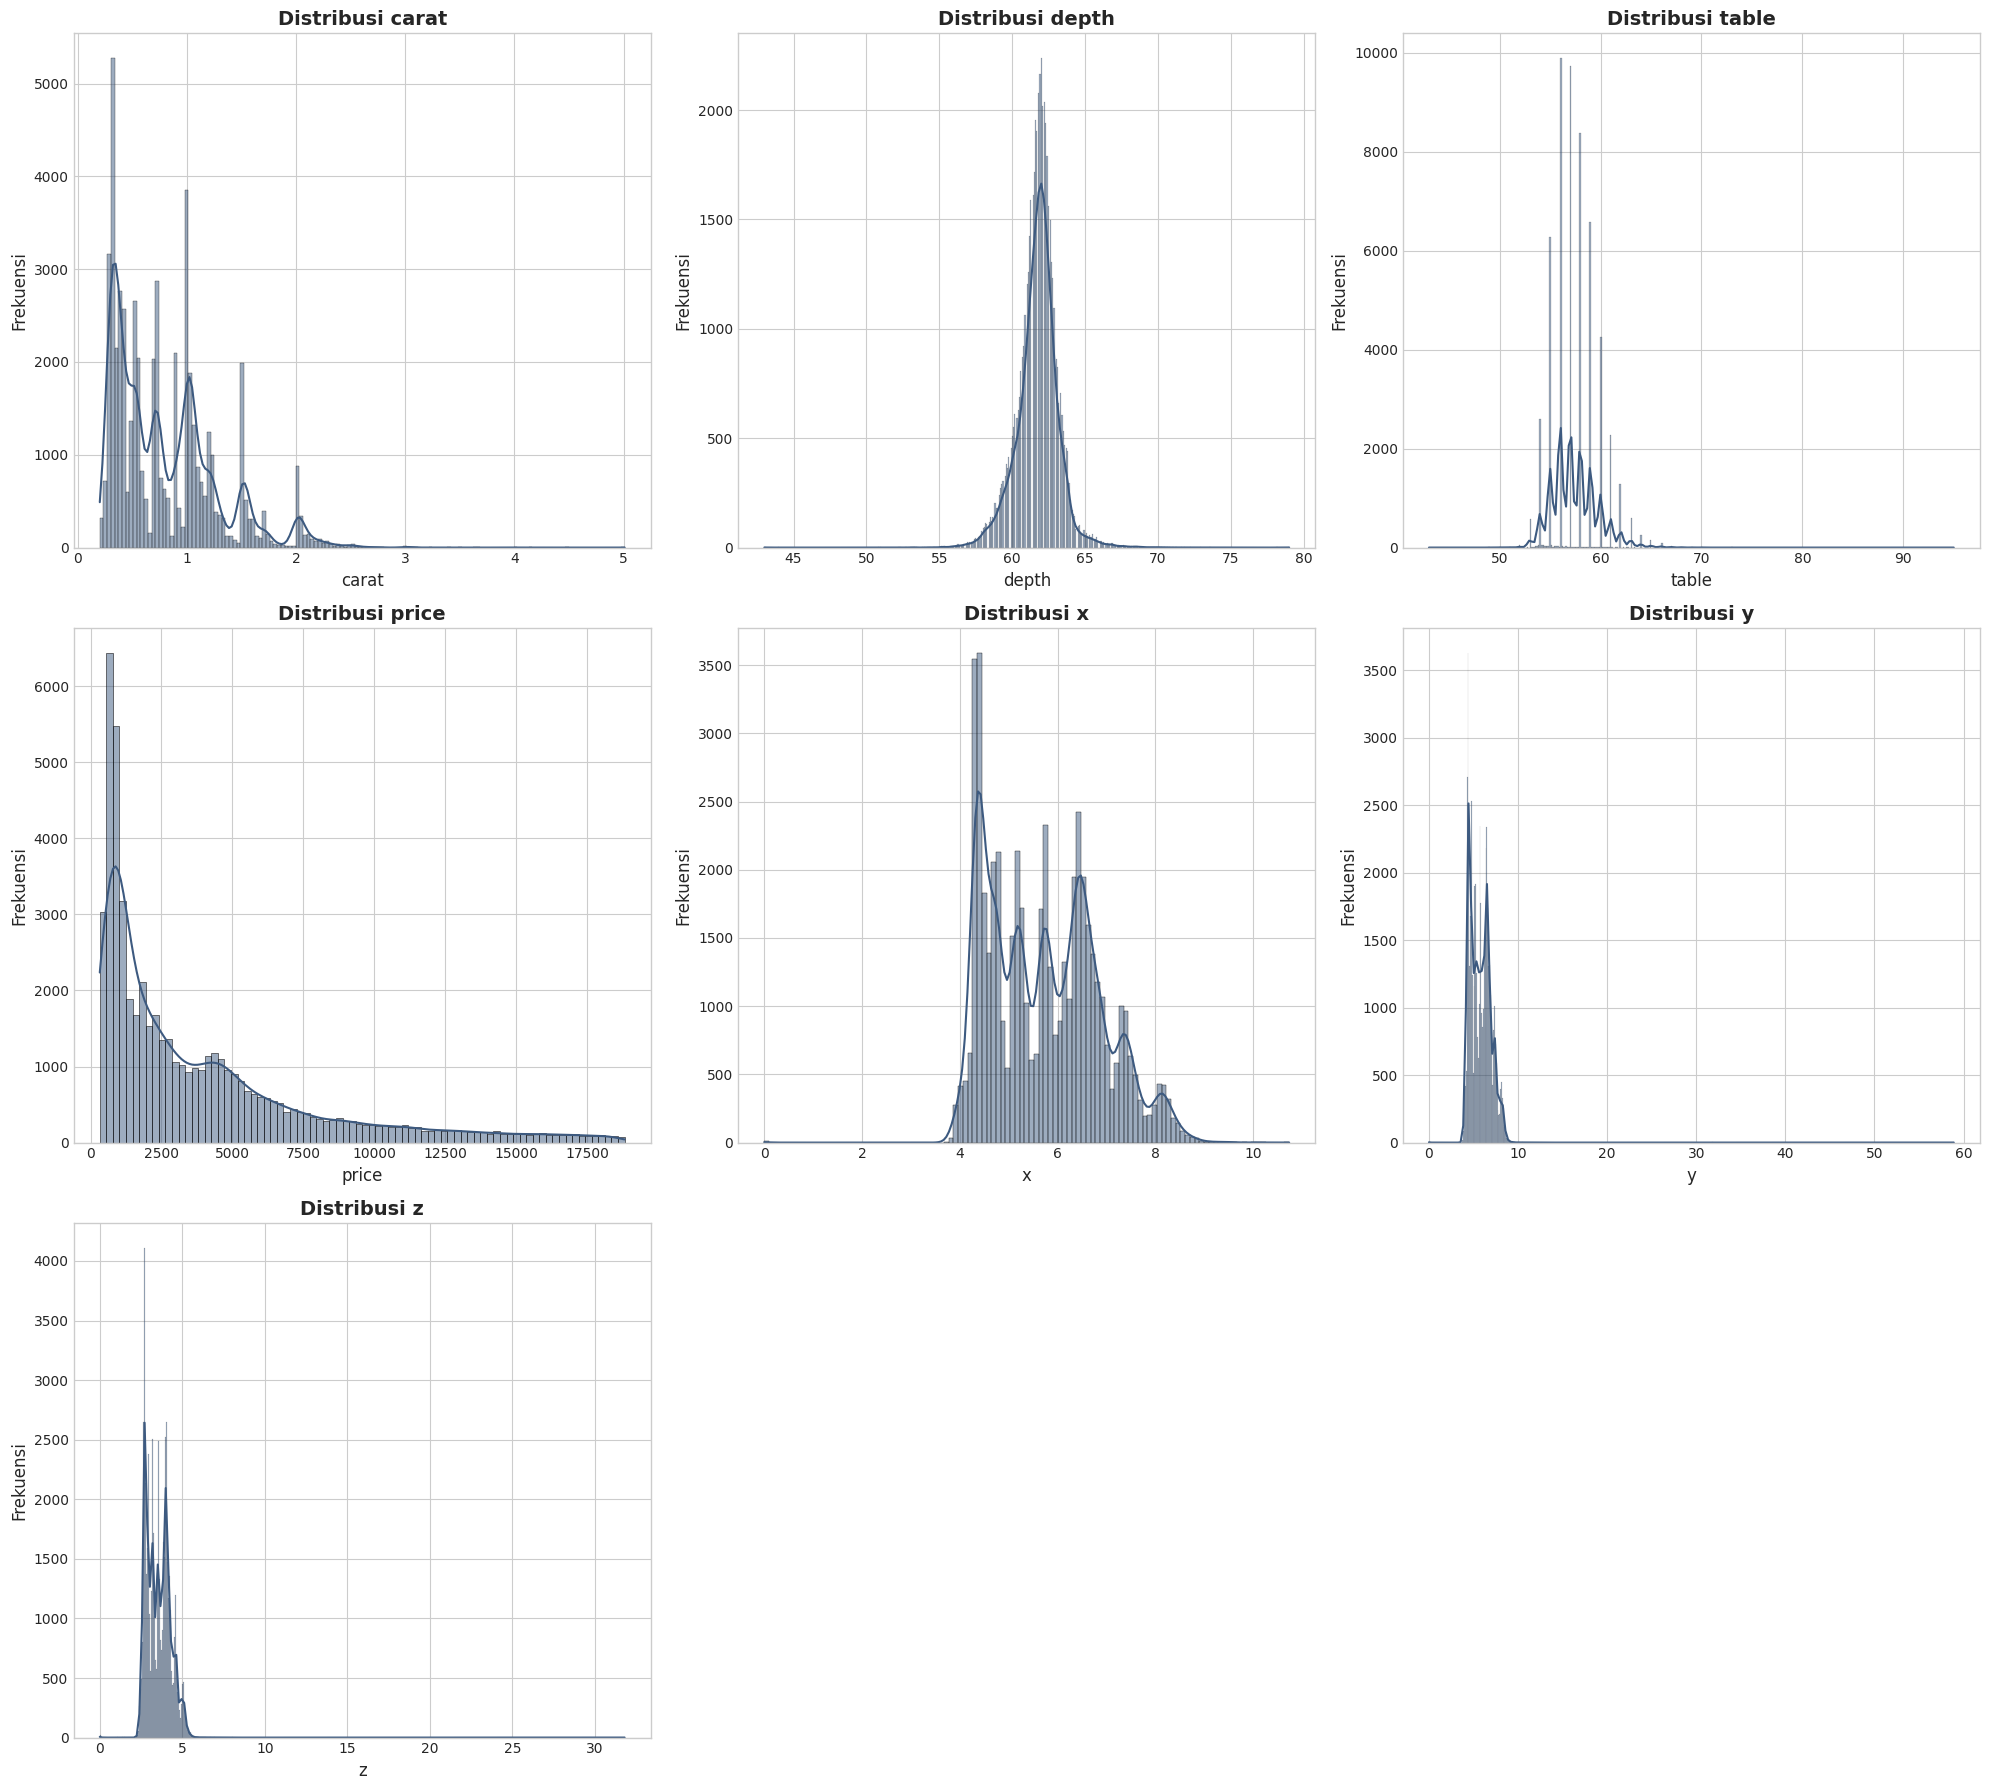

count         mean          std    min     25%      50%      75%  \
carat  53940.0     0.797940     0.474011    0.2    0.40     0.70     1.04   
depth  53940.0    61.749405     1.432621   43.0   61.00    61.80    62.50   
table  53940.0    57.457184     2.234491   43.0   56.00    57.00    59.00   
price  53940.0  3932.799722  3989.439738  326.0  950.00  2401.00  5324.25   
x      53940.0     5.731157     1.121761    0.0    4.71     5.70     6.54   
y      53940.0     5.734526     1.142135    0.0    4.72     5.71     6.54   
z      53940.0     3.538734     0.705699    0.0    2.91     3.53     4.04   

            max  
carat      5.01  
depth     79.00  
table     95.00  
price  18823.00  
x         10.74  
y         58.90  
z         31.80

In [35]:
# Memilih hanya variabel numerik (kecuali indeks)
numeric_cols = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Membuat histograms untuk semua variabel numerik
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 18))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(data=diamonds, x=col, kde=True, ax=axes[i], color='#3D5A80')
    axes[i].set_title(f'Distribusi {col}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Frekuensi', fontsize=12)

# Menambahkan subplot kosong jika perlu
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

# Menampilkan statistik untuk memahami skewness dan outliers
diamonds[numeric_cols].describe().T

<div class="insight-box">
    Dari distribusi variabel numerik, kita dapat melihat:
    <ul>
        <li><b>Price</b>: Variabel target menunjukkan distribusi yang sangat condong kanan (right-skewed), menandakan banyak berlian dengan harga rendah dan sedikit berlian dengan harga tinggi.</li>
        <li><b>Carat</b>: Juga menunjukkan distribusi yang condong kanan, yang berarti mayoritas berlian memiliki berat di bawah 1 carat.</li>
        <li><b>Dimensi (x, y, z)</b>: Distribusi dimensi berlian mengikuti pola serupa dengan carat, yang menunjukkan korelasi antara ukuran dan berat.</li>
        <li><b>Depth dan Table</b>: Menunjukkan distribusi yang lebih simetris, menandakan nilai-nilai yang lebih terpusat di sekitar rata-rata.</li>
    </ul>
</div>

### <div class="header2">Distribusi Variabel Kategorikal</div>

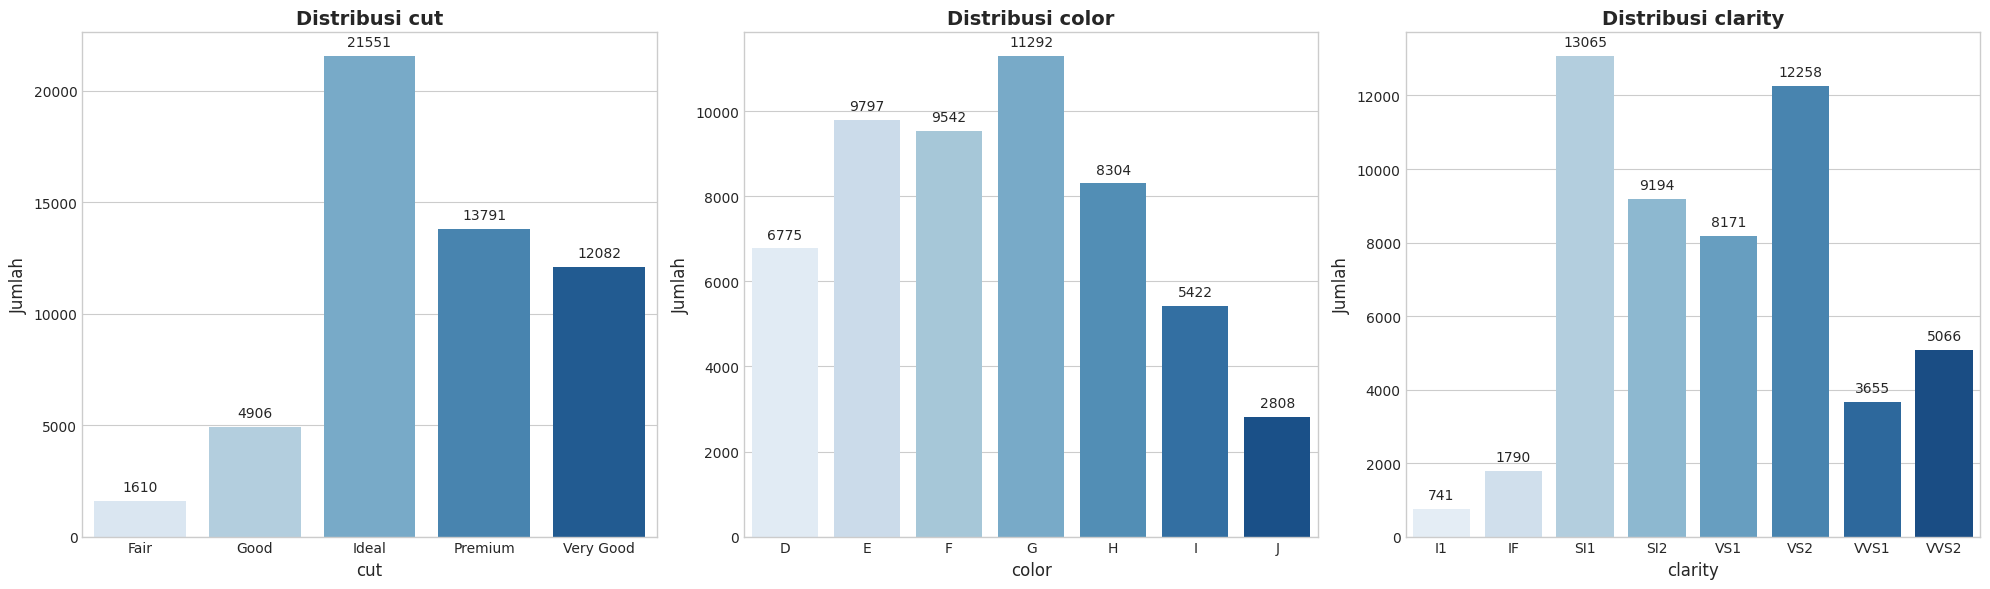

In [36]:
# Variabel kategorikal
cat_cols = ['cut', 'color', 'clarity']

# Membuat countplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

for i, col in enumerate(cat_cols):
    counts = diamonds[col].value_counts().sort_index()
    sns.barplot(x=counts.index, y=counts.values, ax=axes[i], palette='Blues')
    axes[i].set_title(f'Distribusi {col}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Jumlah', fontsize=12)

    # Menambahkan label pada setiap bar
    for p in axes[i].patches:
        axes[i].annotate(f'{int(p.get_height())}',
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', xytext=(0, 10),
                         textcoords='offset points')

plt.tight_layout()
plt.show()


<div class="insight-box">
    Dari distribusi variabel kategorikal, kita dapat melihat:
    <ul>
        <li><b>Cut</b>: Mayoritas berlian memiliki kualitas cut 'Ideal', diikuti oleh 'Premium' dan 'Very Good'. Ini menunjukkan bahwa banyak berlian dalam dataset memiliki kualitas potongan yang baik.</li>
        <li><b>Color</b>: Distribusi warna cenderung lebih tinggi untuk kategori G, H, dan F. Ini menarik karena D adalah kualitas warna terbaik (putih paling murni), tetapi jumlahnya tidak sebanyak kategori lain.</li>
        <li><b>Clarity</b>: SI1 dan VS2 adalah kategori kejernihan yang paling umum. Kejernihan tertinggi (IF) justru memiliki frekuensi yang relatif rendah.</li>
    </ul>
    Ketidakseimbangan dalam distribusi ini mencerminkan realitas pasar berlian, di mana berlian dengan kualitas tertinggi lebih langka.
</div>


## <div class="header2">4.2 Analisis Bivariat</div>
<div class="explain-box">
    Analisis bivariat mempelajari hubungan antara dua variabel. Kita akan fokus pada hubungan antara variabel prediktor dan variabel target (price), serta hubungan antar variabel prediktor.
</div>

### <div class="header2">Hubungan antara Variabel Numerik dan Harga</div>

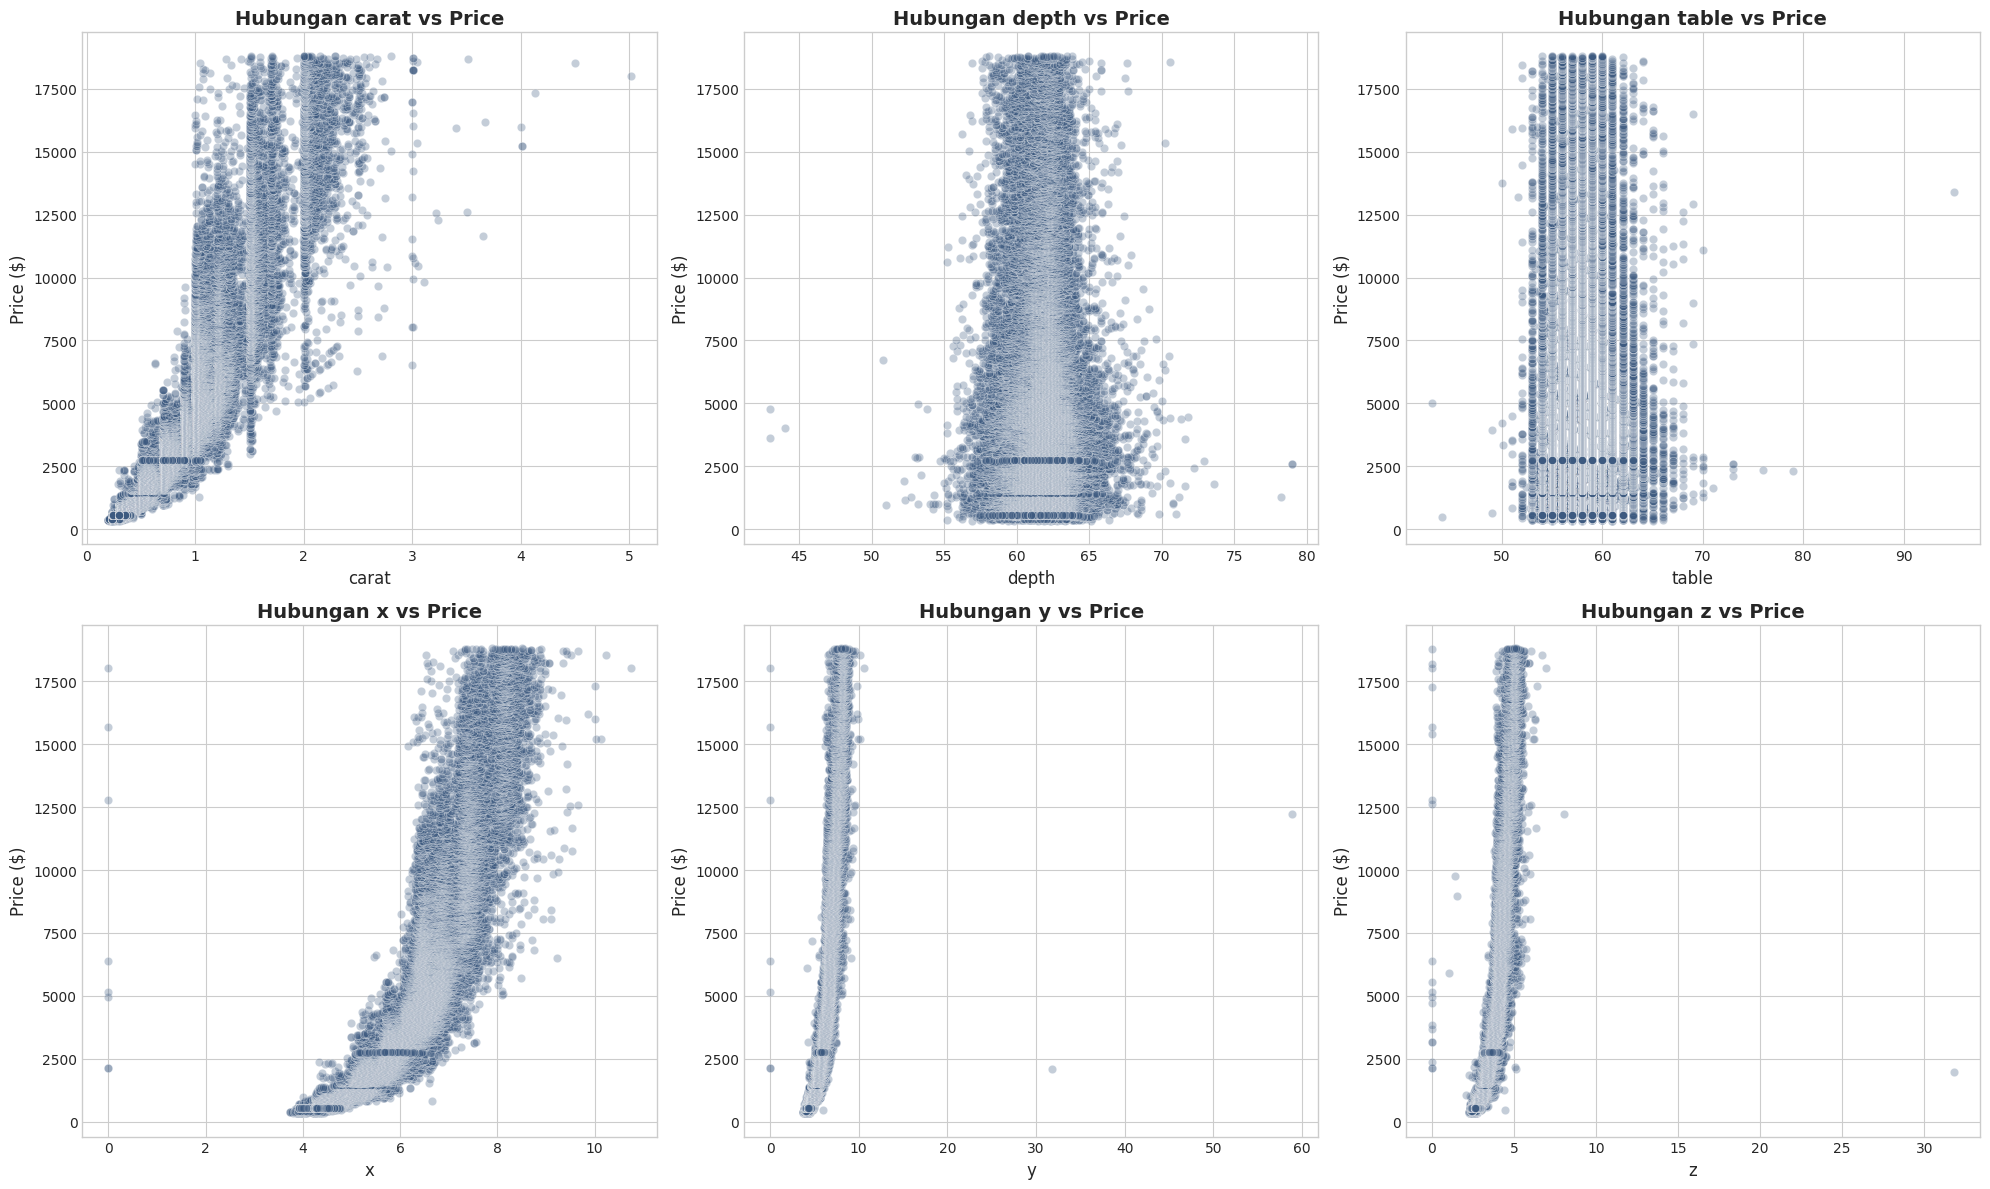

Korelasi dengan harga:
price    1.000000
carat    0.921591
x        0.884435
y        0.865421
z        0.861249
table    0.127134
depth   -0.010647
Name: price, dtype: float64


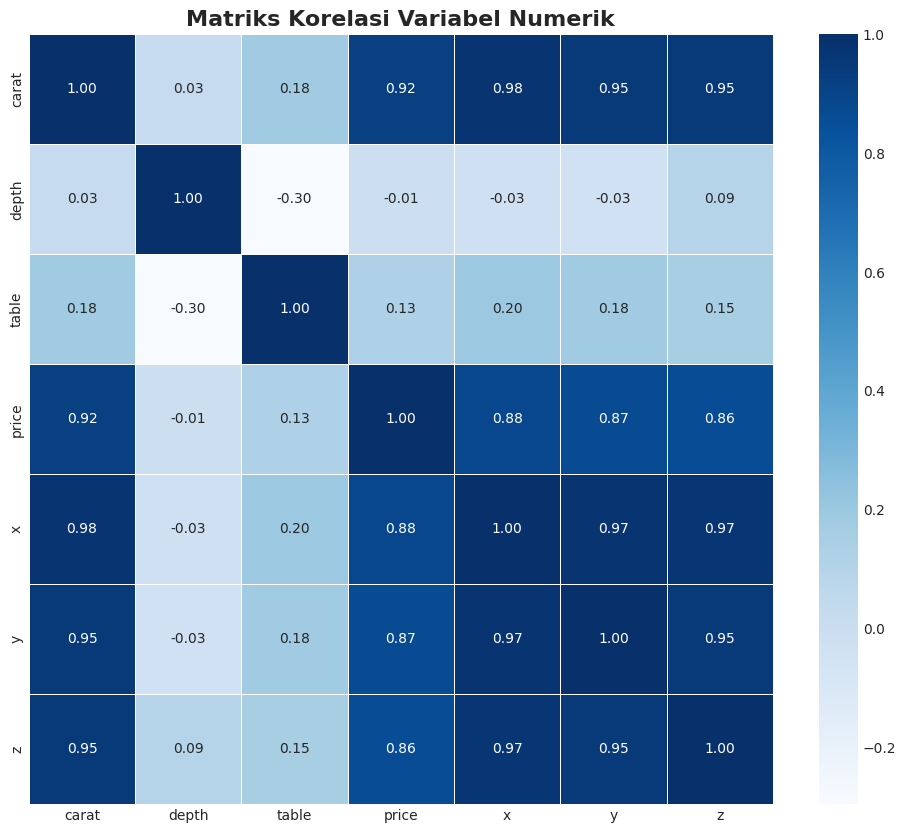

In [37]:
# Scatterplots antara variabel numerik dan harga
numeric_predictors = ['carat', 'depth', 'table', 'x', 'y', 'z']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))
axes = axes.flatten()

for i, col in enumerate(numeric_predictors):
    sns.scatterplot(data=diamonds, x=col, y='price', alpha=0.3, ax=axes[i], color='#3D5A80')
    axes[i].set_title(f'Hubungan {col} vs Price', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Price ($)', fontsize=12)

plt.tight_layout()
plt.show()

# Menghitung korelasi
correlation = diamonds[numeric_cols].corr()
print("Korelasi dengan harga:")
print(correlation['price'].sort_values(ascending=False))

# Heatmap korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi Variabel Numerik', fontsize=16, fontweight='bold')
plt.show()

<div class="insight-box">
    Dari analisis bivariat variabel numerik dengan harga:
    <ul>
        <li><b>Carat dan Dimensi (x, y, z)</b>: Memiliki korelasi positif yang sangat kuat dengan harga. Semakin besar berlian, semakin tinggi harganya, dengan hubungan yang tampak eksponensial.</li>
        <li><b>Depth dan Table</b>: Menunjukkan korelasi yang relatif lemah dengan harga, yang mengindikasikan bahwa faktor-faktor ini mungkin memiliki pengaruh yang lebih kecil pada harga berlian.</li>
        <li><b>Variabel dimensi (x, y, z)</b>: Sangat berkorelasi satu sama lain dan dengan carat, yang menunjukkan masalah multikolinearitas potensial untuk model regresi.</li>
    </ul>
</div>

### <div class="header2">Hubungan antara Variabel Kategorikal dan Harga</div>

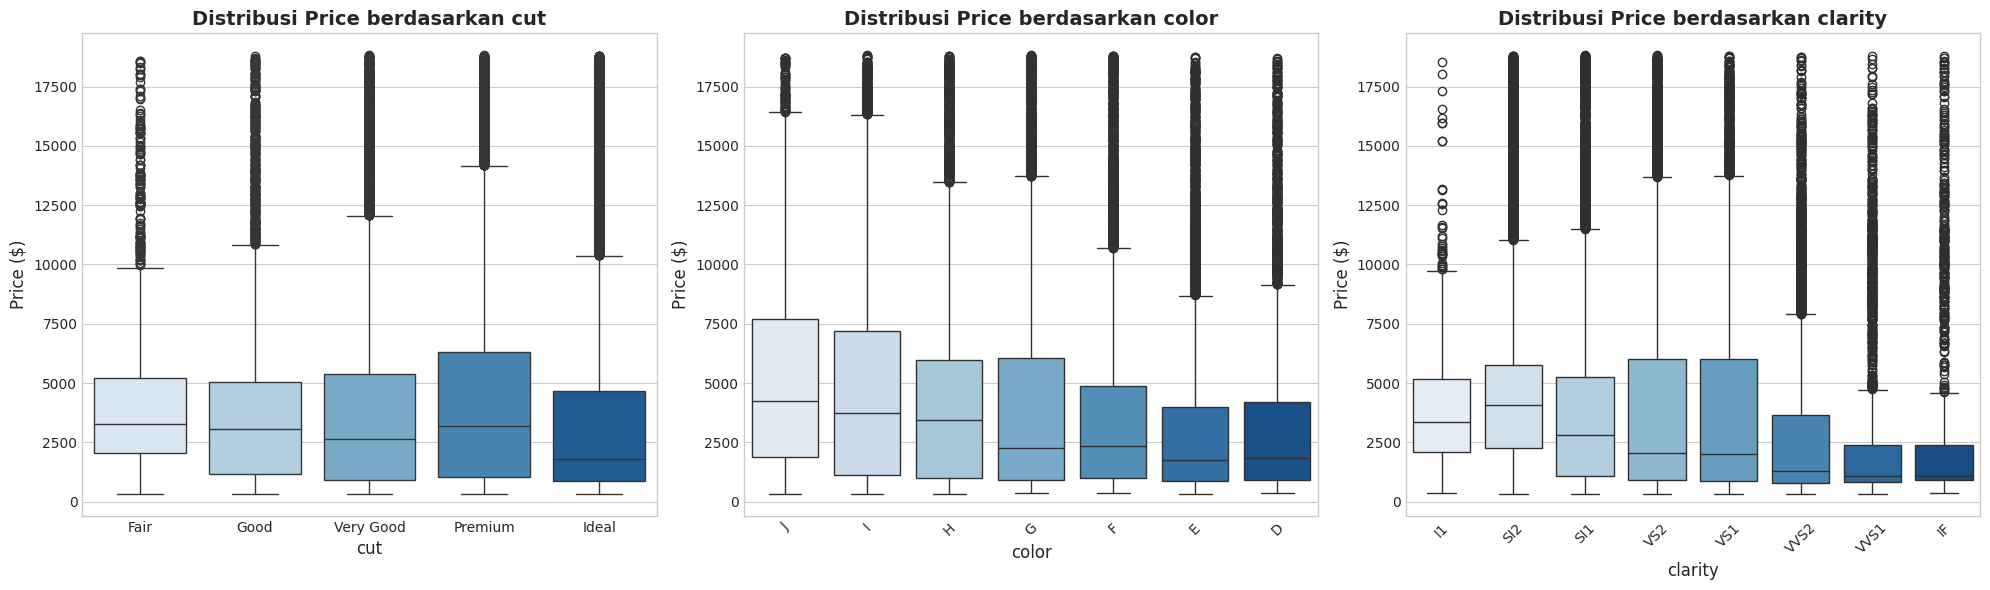


Statistik harga berdasarkan cut:
                  mean  median  min    max  count
cut                                              
Premium    4584.257704  3185.0  326  18823  13791
Fair       4358.757764  3282.0  337  18574   1610
Very Good  3981.759891  2648.0  336  18818  12082
Good       3928.864452  3050.5  327  18788   4906
Ideal      3457.541970  1810.0  326  18806  21551

Statistik harga berdasarkan color:
              mean  median  min    max  count
color                                        
J      5323.818020  4234.0  335  18710   2808
I      5091.874954  3730.0  334  18823   5422
H      4486.669196  3460.0  337  18803   8304
G      3999.135671  2242.0  354  18818  11292
F      3724.886397  2343.5  342  18791   9542
D      3169.954096  1838.0  357  18693   6775
E      3076.752475  1739.0  326  18731   9797

Statistik harga berdasarkan clarity:
                mean  median  min    max  count
clarity                                        
SI2      5063.028606  4072.0  32

In [38]:
# Boxplots untuk melihat distribusi harga berdasarkan variabel kategorikal
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

for i, col in enumerate(cat_cols):
    order = None
    if col == 'cut':
        order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
    elif col == 'color':
        order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
    elif col == 'clarity':
        order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

    sns.boxplot(data=diamonds, x=col, y='price', ax=axes[i], order=order, palette='Blues')
    axes[i].set_title(f'Distribusi Price berdasarkan {col}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Price ($)', fontsize=12)

    # Rotasi label sumbu x jika diperlukan
    if len(diamonds[col].unique()) > 5:
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

# Agregasi statistik harga berdasarkan variabel kategorikal
for col in cat_cols:
    print(f"\nStatistik harga berdasarkan {col}:")
    print(diamonds.groupby(col)['price'].agg(['mean', 'median', 'min', 'max', 'count']).sort_values('mean', ascending=False))

<div class="insight-box">
    Dari analisis bivariat variabel kategorikal dengan harga:
    <ul>
        <li><b>Cut</b>: Menariknya, cut 'Ideal' yang seharusnya kualitas terbaik memiliki rata-rata harga yang lebih rendah daripada beberapa kategori lain. Hal ini mungkin disebabkan oleh interaksi dengan variabel lain seperti carat atau clarity.</li>
        <li><b>Color</b>: Terdapat tren yang jelas di mana berlian dengan warna lebih baik (lebih dekat ke D) cenderung memiliki harga yang lebih tinggi.</li>
        <li><b>Clarity</b>: Terdapat hubungan positif antara kejernihan dan harga, di mana berlian dengan kejernihan lebih tinggi (IF, VVS1) memiliki harga rata-rata yang lebih tinggi.</li>
    </ul>
    Namun, kita perlu berhati-hati karena boxplot menunjukkan variasi yang besar dalam setiap kategori, yang mengindikasikan bahwa faktor lain seperti carat mungkin memiliki pengaruh yang lebih dominan.
</div>

## <div class="header2">4.3 Analisis Multivariat</div>
<div class="explain-box">
    Analisis multivariat mempelajari hubungan antara tiga atau lebih variabel secara bersamaan. Kita akan melihat bagaimana kombinasi beberapa variabel mempengaruhi harga berlian.
</div>

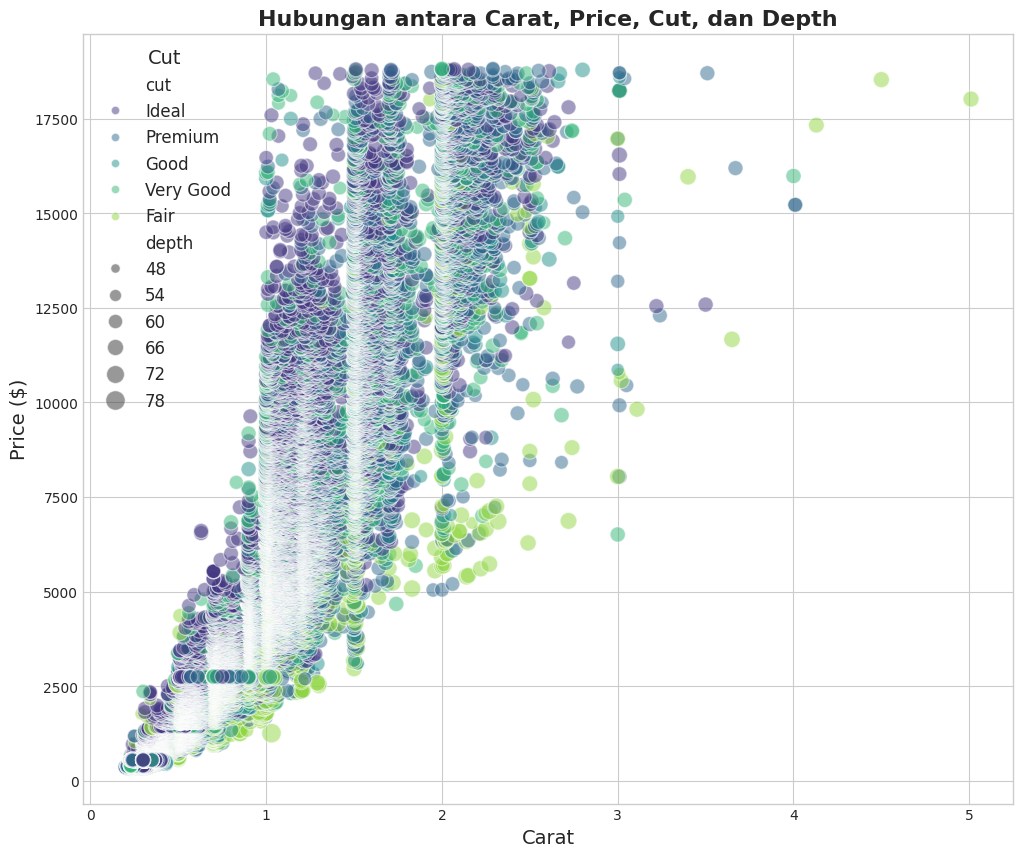

<Figure size 1200x1000 with 0 Axes>

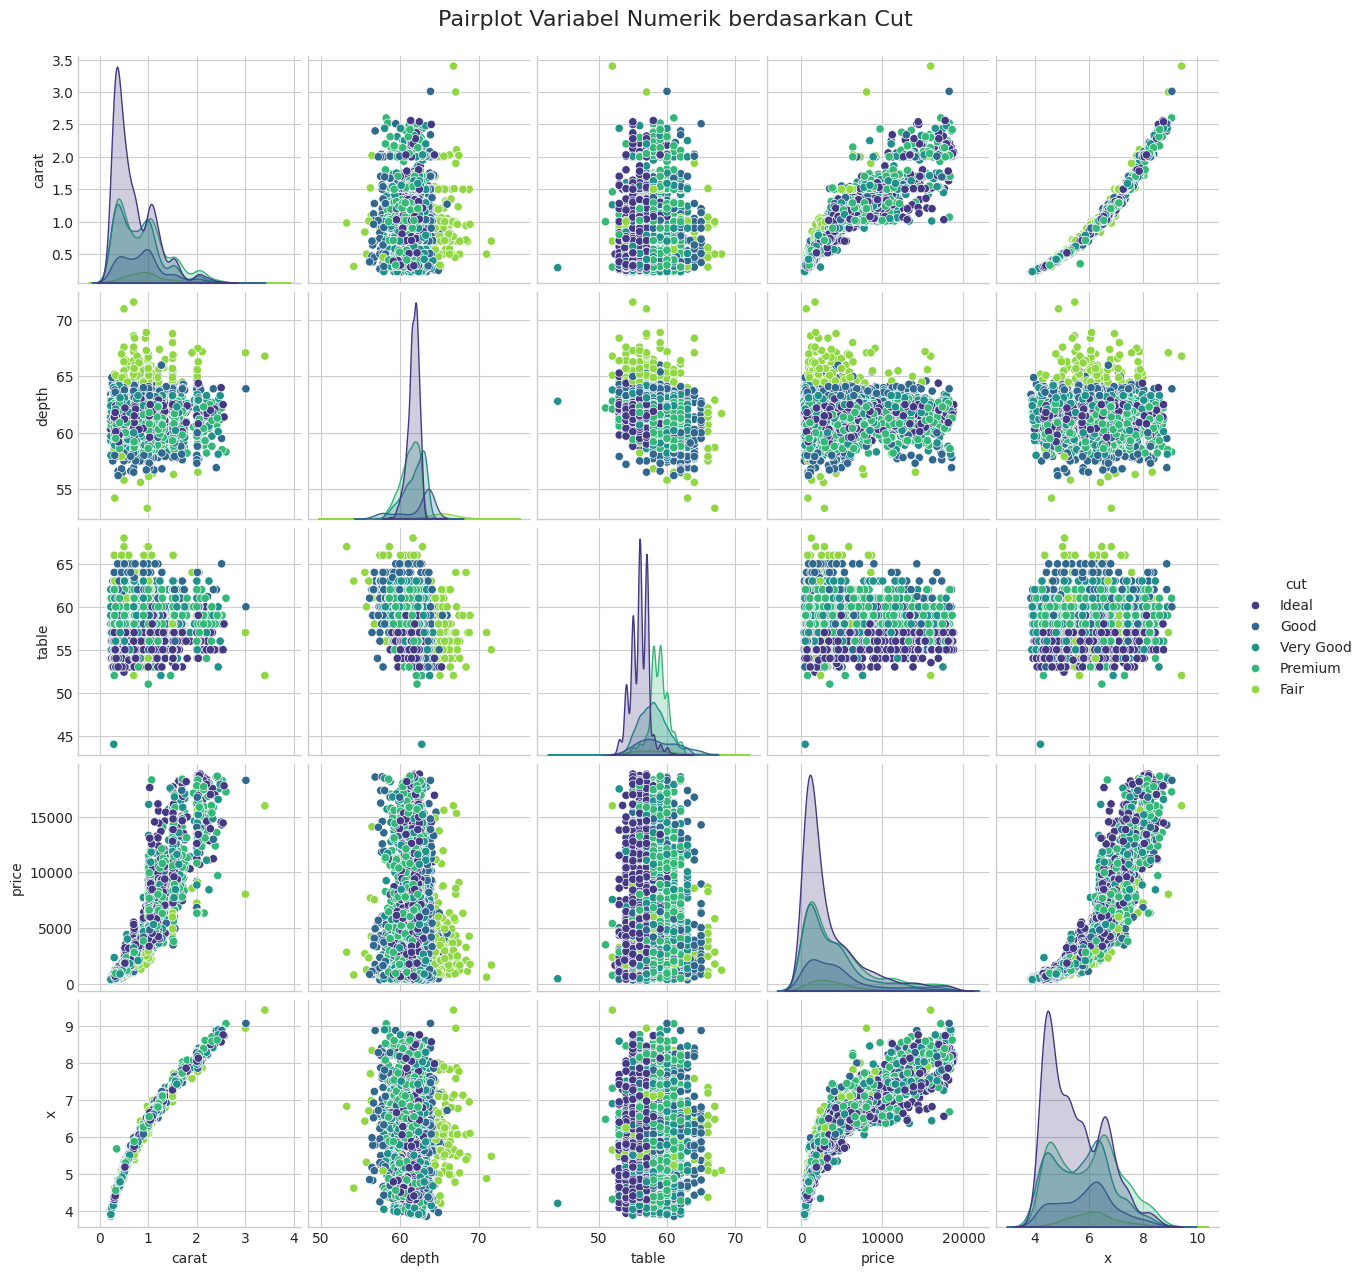

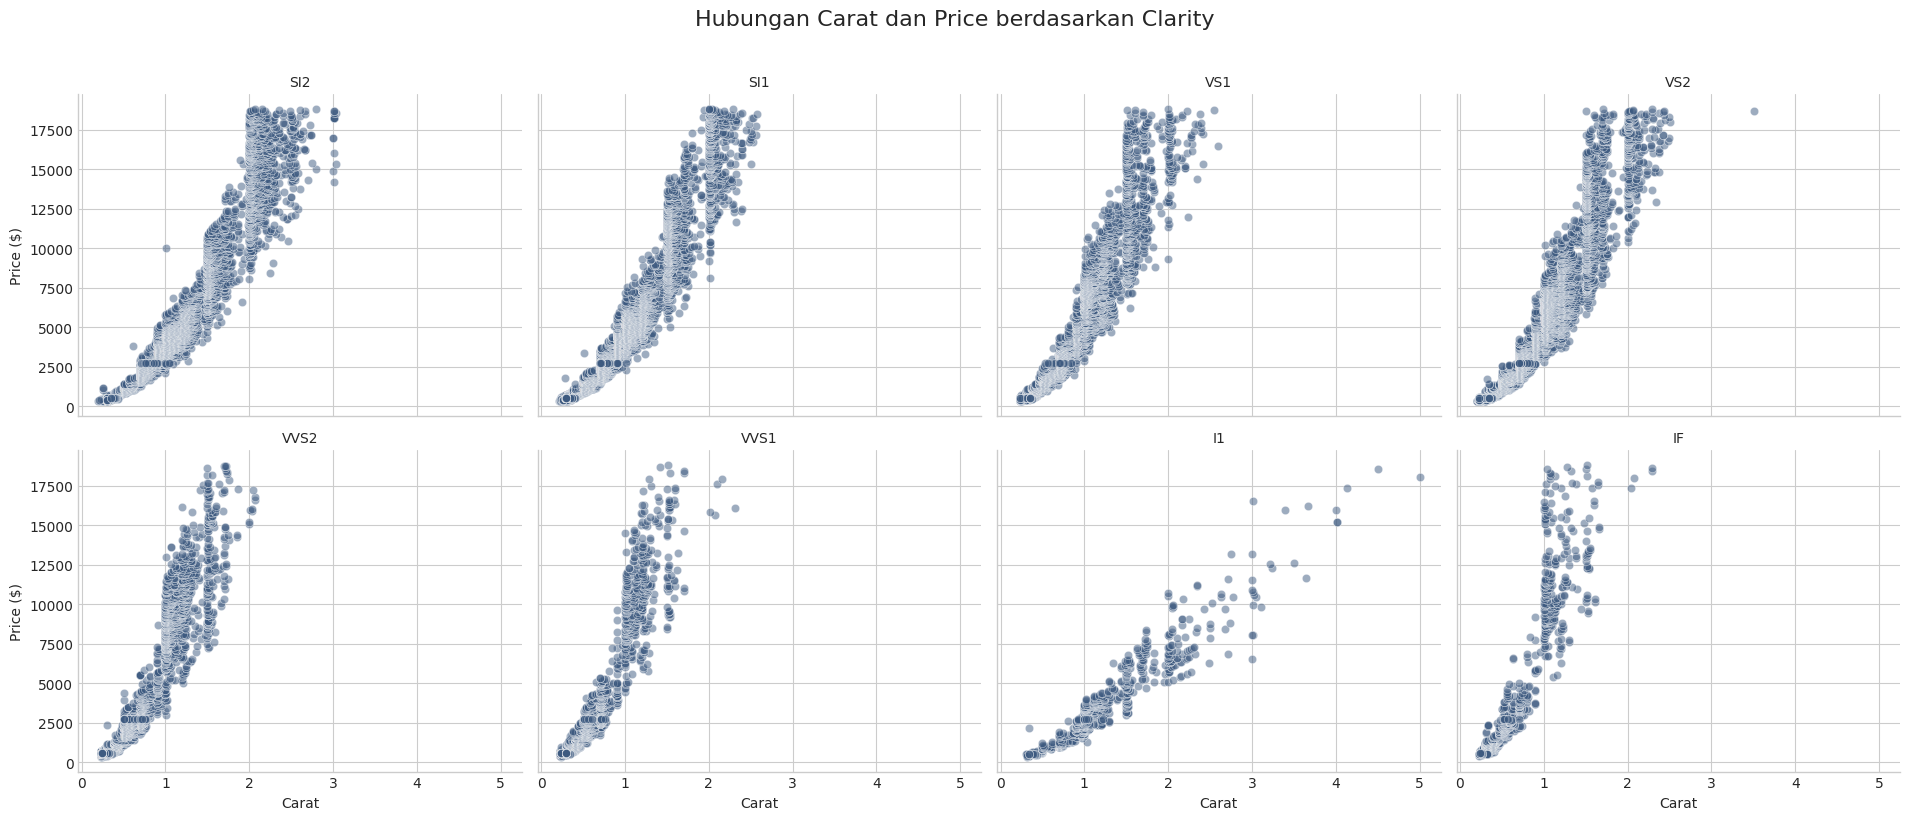

In [39]:
# Scatterplot dengan multiple variabel
plt.figure(figsize=(12, 10))
sns.scatterplot(data=diamonds, x='carat', y='price', hue='cut', size='depth',
                sizes=(20, 200), alpha=0.5, palette='viridis')
plt.title('Hubungan antara Carat, Price, Cut, dan Depth', fontsize=16, fontweight='bold')
plt.xlabel('Carat', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.legend(title='Cut', fontsize=12, title_fontsize=14)
plt.show()

# Pairplot untuk melihat hubungan antar variabel numerik dan kategorikal
plt.figure(figsize=(12, 10))
sns.pairplot(diamonds.sample(5000), hue='cut', vars=['carat', 'depth', 'table', 'price', 'x'],
             palette='viridis', diag_kind='kde', height=2.5)
plt.suptitle('Pairplot Variabel Numerik berdasarkan Cut', fontsize=16, y=1.02)
plt.show()

# Hubungan carat dan price berdasarkan clarity
g = sns.FacetGrid(diamonds, col="clarity", col_wrap=4, height=4, aspect=1.2)
g.map_dataframe(sns.scatterplot, x="carat", y="price", alpha=0.5, color='#3D5A80')
g.set_axis_labels("Carat", "Price ($)")
g.set_titles(col_template="{col_name}")
g.fig.suptitle('Hubungan Carat dan Price berdasarkan Clarity', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

<div class="insight-box">
    Analisis multivariat mengungkapkan beberapa pola menarik:
    <ul>
        <li>Hubungan antara carat dan price terlihat konsisten di seluruh kategori cut, color, dan clarity, dengan tren eksponensial yang sama.</li>
        <li>Berlian dengan clarity tinggi (IF, VVS1) menunjukkan peningkatan harga yang lebih curam berdasarkan carat dibandingkan berlian dengan clarity rendah.</li>
        <li>Terdapat interaksi yang kompleks antara variabel-variabel prediktor. Misalnya, berlian dengan cut 'Ideal' mungkin memiliki harga lebih rendah karena cenderung memiliki carat yang lebih kecil.</li>
        <li>Dimensi berlian (x, y, z) sangat berkorelasi dengan carat, sehingga mempertimbangkan semua variabel ini dalam model mungkin akan menimbulkan multikolinearitas.</li>
    </ul>
</div>

# <div class="header1">5. | Preprocessing Data 🧹</div>

## <div class="header2">5.1 Penanganan Kolom Indeks</div>
<div class="explain-box">
    Langkah pertama dalam preprocessing adalah menangani kolom indeks dan melakukan pembersihan data dasar.
</div>

In [40]:
# Melihat kolom pertama yang tampaknya hanya indeks
diamonds.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

<div class="insight-box">
    Kolom pertama ("") tampaknya hanya berisi indeks baris. Kita akan menghapusnya karena tidak memberikan informasi penting untuk prediksi harga.
</div>

In [41]:
# Menghapus kolom indeks
diamonds = diamonds.drop(diamonds.columns[0], axis=1)

# Memeriksa kolom setelah penghapusan
diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

<div class="insight-box">
    Kolom indeks berhasil dihapus. Sekarang dataset hanya berisi 10 kolom yang relevan untuk analisis.
</div>

## <div class="header2">5.2 Penanganan Nilai Outlier</div>
<div class="explain-box">
    Outlier dapat mempengaruhi performa model regresi. Kita perlu mendeteksi dan memutuskan cara menangani outlier dalam dataset.
</div>

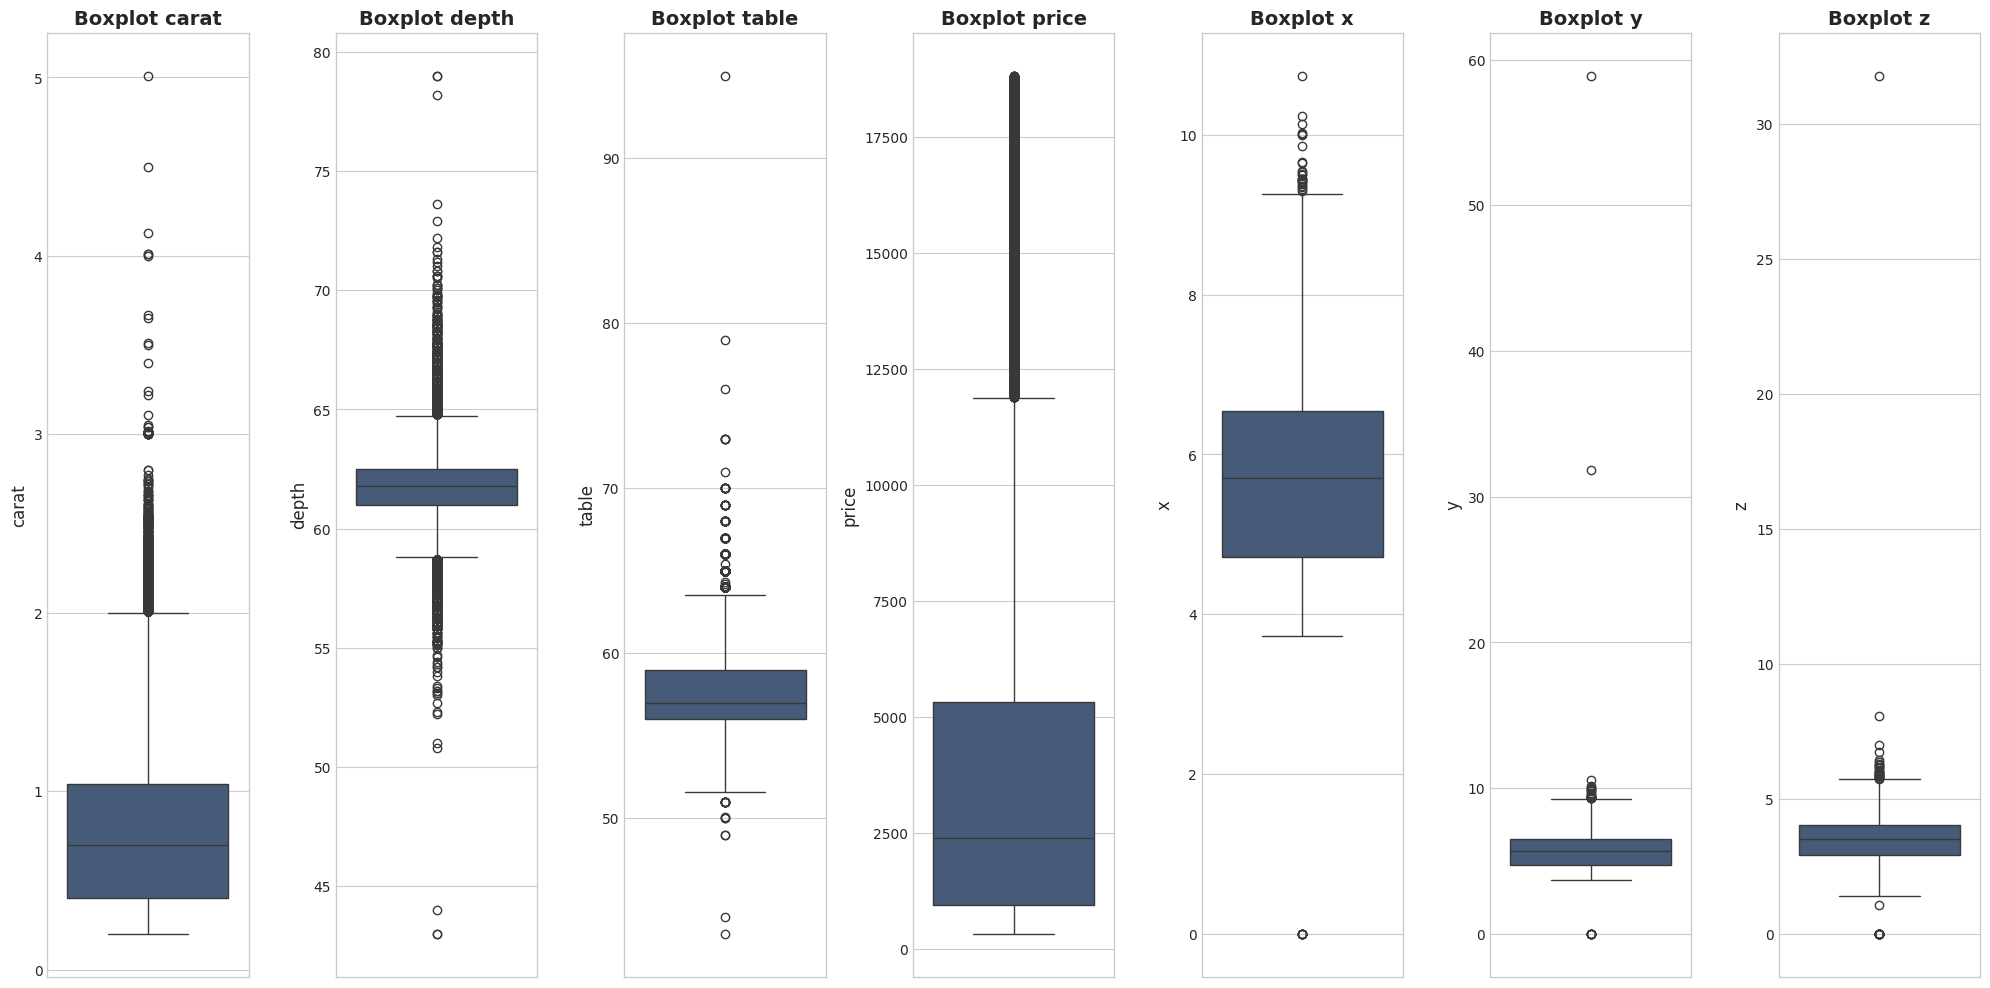

Outlier pada carat: 1889 baris (3.50%)
Batas bawah: -0.56, Batas atas: 2.00
Min: 0.20, Max: 5.01
---
Outlier pada depth: 2545 baris (4.72%)
Batas bawah: 58.75, Batas atas: 64.75
Min: 43.00, Max: 79.00
---
Outlier pada table: 605 baris (1.12%)
Batas bawah: 51.50, Batas atas: 63.50
Min: 43.00, Max: 95.00
---
Outlier pada price: 3540 baris (6.56%)
Batas bawah: -5611.38, Batas atas: 11885.62
Min: 326.00, Max: 18823.00
---
Outlier pada x: 32 baris (0.06%)
Batas bawah: 1.96, Batas atas: 9.29
Min: 0.00, Max: 10.74
---
Outlier pada y: 29 baris (0.05%)
Batas bawah: 1.99, Batas atas: 9.27
Min: 0.00, Max: 58.90
---
Outlier pada z: 49 baris (0.09%)
Batas bawah: 1.22, Batas atas: 5.73
Min: 0.00, Max: 31.80
---


In [42]:
# Mencari outlier pada variabel numerik
def plot_boxplot(df, columns, figsize=(20, 10)):
    fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=figsize)

    if len(columns) == 1:
        axes = [axes]

    for i, col in enumerate(columns):
        sns.boxplot(y=df[col], ax=axes[i], color='#3D5A80')
        axes[i].set_title(f'Boxplot {col}', fontsize=14, fontweight='bold')
        axes[i].set_ylabel(col, fontsize=12)

    plt.tight_layout()
    plt.show()

# Boxplot untuk variabel numerik
plot_boxplot(diamonds, ['carat', 'depth', 'table', 'price', 'x', 'y', 'z'])

# Mendeteksi outlier menggunakan IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    return outliers, lower_bound, upper_bound

# Memeriksa jumlah outlier untuk setiap variabel numerik
for col in ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']:
    outliers, lower, upper = detect_outliers(diamonds, col)
    print(f"Outlier pada {col}: {len(outliers)} baris ({len(outliers)/len(diamonds)*100:.2f}%)")
    print(f"Batas bawah: {lower:.2f}, Batas atas: {upper:.2f}")
    print(f"Min: {diamonds[col].min():.2f}, Max: {diamonds[col].max():.2f}")
    print("---")

<div class="insight-box">
    Analisis outlier menunjukkan:
    <ul>
        <li>Terdapat outlier pada semua variabel numerik, terutama pada price, carat, dan dimensi (x, y, z).</li>
        <li>Beberapa nilai sangat ekstrem, seperti pada variabel y dan z, yang mungkin merupakan kesalahan pengukuran.</li>
        <li>Outlier pada price mungkin menggambarkan berlian premium yang memang sangat mahal, bukan kesalahan data.</li>
    </ul>
    Kita perlu memutuskan cara menangani outlier ini. Untuk dataset berlian, outlier pada carat dan price mungkin mewakili berlian premium yang valid, sehingga tidak harus dihapus. Namun, outlier ekstrem pada dimensi (terutama jika nilainya 0) mungkin merupakan kesalahan data.
</div>

In [43]:
# Memeriksa apakah ada nilai 0 atau negatif pada dimensi berlian
zero_dimensions = diamonds[(diamonds['x'] <= 0) | (diamonds['y'] <= 0) | (diamonds['z'] <= 0)]
print(f"Jumlah berlian dengan dimensi 0 atau negatif: {len(zero_dimensions)}")
if len(zero_dimensions) > 0:
    print(zero_dimensions)

Jumlah berlian dengan dimensi 0 atau negatif: 20
       carat        cut color clarity  depth  table  price     x     y    z
2207    1.00    Premium     G     SI2   59.1   59.0   3142  6.55  6.48  0.0
2314    1.01    Premium     H      I1   58.1   59.0   3167  6.66  6.60  0.0
4791    1.10    Premium     G     SI2   63.0   59.0   3696  6.50  6.47  0.0
5471    1.01    Premium     F     SI2   59.2   58.0   3837  6.50  6.47  0.0
10167   1.50       Good     G      I1   64.0   61.0   4731  7.15  7.04  0.0
11182   1.07      Ideal     F     SI2   61.6   56.0   4954  0.00  6.62  0.0
11963   1.00  Very Good     H     VS2   63.3   53.0   5139  0.00  0.00  0.0
13601   1.15      Ideal     G     VS2   59.2   56.0   5564  6.88  6.83  0.0
15951   1.14       Fair     G     VS1   57.5   67.0   6381  0.00  0.00  0.0
24394   2.18    Premium     H     SI2   59.4   61.0  12631  8.49  8.45  0.0
24520   1.56      Ideal     G     VS2   62.2   54.0  12800  0.00  0.00  0.0
26123   2.25    Premium     I     SI1  

<div class="warning-box">
    Terdapat beberapa berlian dengan dimensi 0 atau negatif, yang jelas merupakan kesalahan data. Berlian tidak mungkin memiliki dimensi 0 atau negatif. Kita perlu membersihkan data ini sebelum membangun model.
</div>

In [44]:
# Menghapus baris dengan dimensi 0 atau negatif
diamonds_cleaned = diamonds[(diamonds['x'] > 0) & (diamonds['y'] > 0) & (diamonds['z'] > 0)]
print(f"Jumlah baris sebelum pembersihan: {len(diamonds)}")
print(f"Jumlah baris setelah pembersihan: {len(diamonds_cleaned)}")
print(f"Jumlah baris yang dihapus: {len(diamonds) - len(diamonds_cleaned)}")

# Menetapkan dataset bersih untuk analisis selanjutnya
diamonds = diamonds_cleaned

Jumlah baris sebelum pembersihan: 53940
Jumlah baris setelah pembersihan: 53920
Jumlah baris yang dihapus: 20


<div class="insight-box">
    Baris dengan dimensi 0 atau negatif berhasil dihapus. Dataset sekarang lebih bersih dan siap untuk analisis lebih lanjut. Jumlah data yang dihapus relatif kecil dibandingkan dengan ukuran total dataset, sehingga tidak akan berdampak signifikan pada analisis.
</div>

## <div class="header2">5.3 Transformasi Variabel Kategorikal</div>
<div class="explain-box">
    Variabel kategorikal perlu ditransformasi menjadi bentuk numerik agar dapat digunakan dalam model regresi. Kita akan menggunakan teknik one-hot encoding untuk variabel kategorikal.
</div>

In [45]:
# Memeriksa ordinalitas variabel kategorikal
for col in cat_cols:
    print(f"Variabel: {col}")
    if col == 'cut':
        order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
    elif col == 'color':
        order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
    elif col == 'clarity':
        order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

    temp_df = diamonds.groupby(col)['price'].mean().reset_index()
    temp_df = temp_df.sort_values('price', ascending=False)

    print("Urutan berdasarkan harga rata-rata:")
    print(temp_df)

    print(f"Urutan teoritis: {order}")
    print("---")

Variabel: cut
Urutan berdasarkan harga rata-rata:
         cut        price
3    Premium  4579.684543
0       Fair  4357.500932
4  Very Good  3981.664101
1       Good  3926.403509
2      Ideal  3456.941201
Urutan teoritis: ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
---
Variabel: color
Urutan berdasarkan harga rata-rata:
  color        price
6     J  5323.818020
5     I  5089.973990
4     H  4480.942155
3     G  3996.876551
2     F  3725.080205
0     D  3168.106436
1     E  3076.752475
Urutan teoritis: ['J', 'I', 'H', 'G', 'F', 'E', 'D']
---
Variabel: clarity
Urutan berdasarkan harga rata-rata:
  clarity        price
3     SI2  5060.440174
2     SI1  3994.112608
0      I1  3926.189702
5     VS2  3922.866819
4     VS1  3839.144308
7    VVS2  3283.737071
1      IF  2864.839106
6    VVS1  2519.512315
Urutan teoritis: ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
---


<div class="insight-box">
    Analisis ordinalitas variabel kategorikal menunjukkan:
    <ul>
        <li><b>Cut</b>: Urutan berdasarkan harga rata-rata tidak sepenuhnya sejalan dengan urutan teoritis kualitas. Premium memiliki harga rata-rata tertinggi, bukan Ideal.</li>
        <li><b>Color</b>: Urutan berdasarkan harga rata-rata cukup sejalan dengan urutan teoritis (D sebagai terbaik).</li>
        <li><b>Clarity</b>: Urutan berdasarkan harga rata-rata juga cukup konsisten dengan urutan teoritis (IF sebagai terbaik).</li>
    </ul>
    Karena urutan berdasarkan harga tidak selalu mengikuti urutan teoritis (terutama untuk cut), kita akan menggunakan one-hot encoding daripada ordinal encoding untuk menghindari asumsi hubungan ordinal yang tidak tepat.
</div>

## <div class="header2">5.4 Persiapan Model</div>
<div class="explain-box">
    Sekarang kita akan mempersiapkan data untuk pemodelan, termasuk pembagian data training dan testing, serta pipeline preprocessing.
</div>

In [46]:
# Membagi fitur dan target
X = diamonds.drop('price', axis=1)
y = diamonds['price']

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Jumlah data training: {len(X_train)}")
print(f"Jumlah data testing: {len(X_test)}")

# Membuat pipeline preprocessing
# Identifikasi kolom numerik dan kategorikal
numeric_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
categorical_features = ['cut', 'color', 'clarity']

# Membuat preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Memeriksa hasil preprocessing
preprocessing_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
X_train_processed = preprocessing_pipeline.fit_transform(X_train)

print(f"Bentuk data sebelum preprocessing: {X_train.shape}")
print(f"Bentuk data setelah preprocessing: {X_train_processed.shape}")

Jumlah data training: 43136
Jumlah data testing: 10784
Bentuk data sebelum preprocessing: (43136, 9)
Bentuk data setelah preprocessing: (43136, 23)


<div class="insight-box">
    Data berhasil dibagi menjadi set training dan testing dengan rasio 80:20. Pipeline preprocessing telah dibuat untuk:
    <ul>
        <li>Melakukan standardisasi pada fitur numerik untuk menyamakan skala</li>
        <li>Melakukan one-hot encoding pada fitur kategorikal (dengan drop='first' untuk menghindari multikolinearitas)</li>
    </ul>
    Jumlah fitur meningkat setelah preprocessing karena one-hot encoding mengubah setiap kategori menjadi kolom terpisah.
</div>

# <div class="header1">6. | Pemilihan Metode Regresi 🔍</div>

## <div class="header2">Pertimbangan Pemilihan Metode</div>
<div class="explain-box">
    Berdasarkan analisis EDA dan karakteristik dataset, kita akan memilih dua metode regresi yang sesuai untuk prediksi harga berlian. Pertimbangan pemilihan metode meliputi:
    <ul>
        <li>Hubungan antara variabel prediktor dan target (linear atau non-linear)</li>
        <li>Jumlah data dan dimensi fitur</li>
        <li>Kemampuan menangani interaksi antar fitur</li>
        <li>Interpretabilitas model</li>
    </ul>
</div>

<div class="explain-box">
    Berdasarkan pertimbangan di atas, kita akan menggunakan dua metode regresi berikut:
    <ul>
        <li><b>Multiple Linear Regression (MLR)</b>: Untuk memahami pengaruh linear dari setiap fitur terhadap harga. Model ini sederhana dan interpretasinya mudah.</li>
        <li><b>Random Forest Regression (RFR)</b>: Untuk menangkap hubungan non-linear dan interaksi kompleks antar fitur. Model ini biasanya memberikan performa yang baik untuk data dengan pola kompleks.</li>
    </ul>
</div>

## <div class="header2">Alasan Pemilihan Metode</div>

<div class="explain-box">
    <b>1. Multiple Linear Regression (MLR)</b>
    <ul>
        <li>Sederhana dan interpretasinya mudah, memungkinkan kita memahami kontribusi masing-masing fitur</li>
        <li>Komputasi yang efisien dan cepat, cocok untuk dataset besar</li>
        <li>Dapat menjadi baseline untuk perbandingan dengan model yang lebih kompleks</li>
        <li>Cocok untuk hubungan linear, meskipun kita perlu berhati-hati karena hubungan antara carat dan price terlihat non-linear</li>
    </ul>
    <b>2. Random Forest Regression (RFR)</b>
    <ul>
        <li>Dapat menangkap hubungan non-linear yang kompleks antara fitur dan target</li>
        <li>Mampu menangani interaksi antar fitur secara otomatis</li>
        <li>Robust terhadap outlier dan kurang rentan terhadap overfitting</li>
        <li>Dapat memberikan feature importance untuk mengidentifikasi fitur yang paling berpengaruh</li>
        <li>Cocok untuk dataset berlian karena dapat menangkap pola kompleks dan interaksi antar variabel seperti carat, cut, color, dan clarity</li>
    </ul>
</div>

# <div class="header1">7. | Membangun Model Regresi 🔧</div>

## <div class="header2">7.1 Multiple Linear Regression</div>
<div class="explain-box">
    Kita akan membangun model regresi linear untuk memprediksi harga berlian. Model ini akan membantu kita memahami hubungan linear antara fitur dan target.
</div>

Multiple Linear Regression:
Mean Squared Error (MSE): 1290368.13
Root Mean Squared Error (RMSE): 1135.94
R-squared (R²): 0.9195
Mean Absolute Error (MAE): 726.30


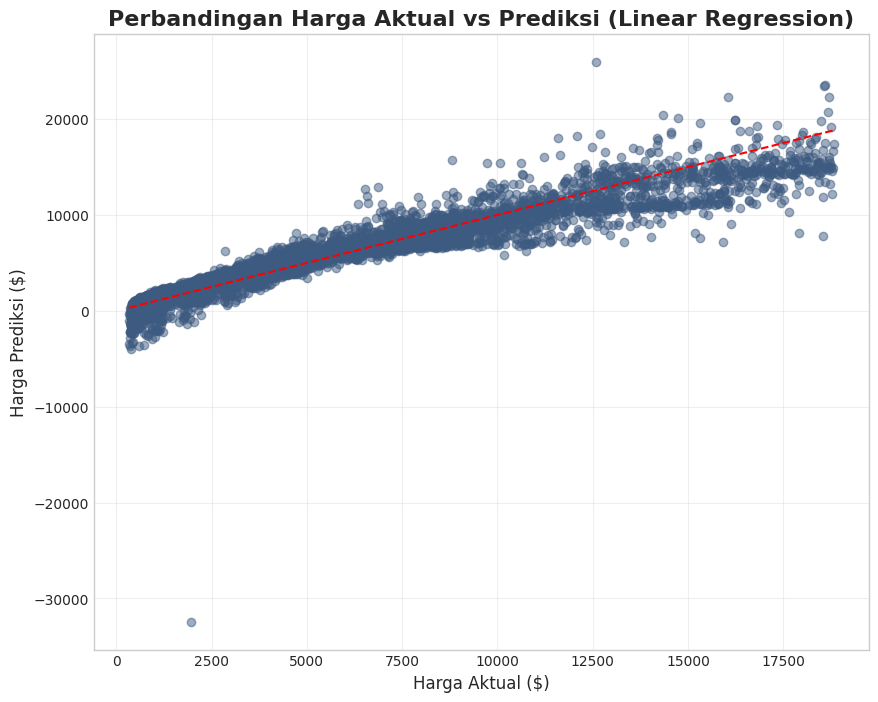

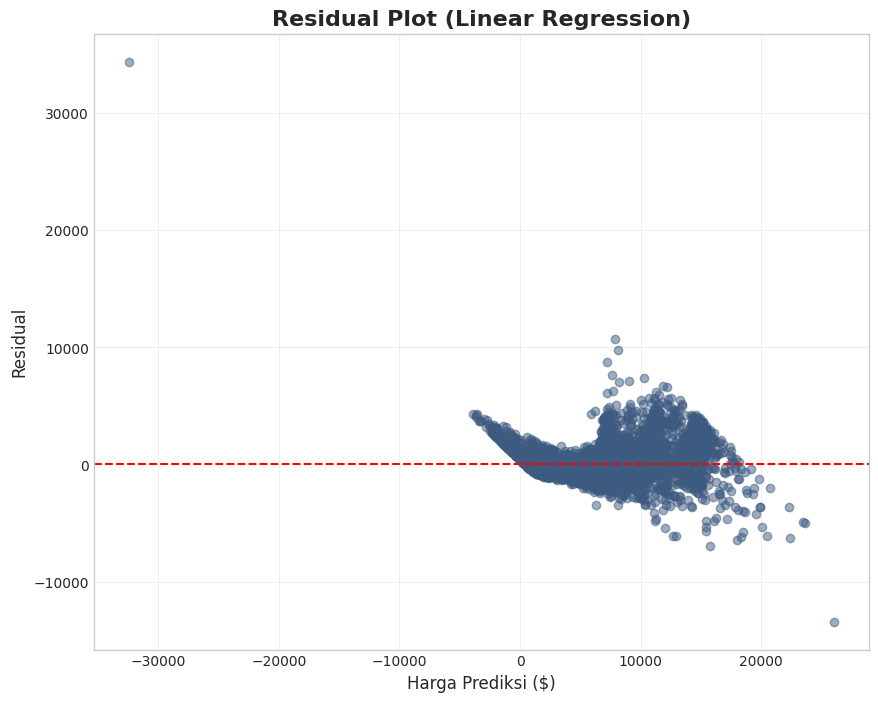

In [50]:
# Pipeline untuk Linear Regression
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Training model
lr_pipeline.fit(X_train, y_train)

# Prediksi pada data testing
y_pred_lr = lr_pipeline.predict(X_test)

# Evaluasi model
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print("Multiple Linear Regression:")
print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.2f}")
print(f"R-squared (R²): {r2_lr:.4f}")
print(f"Mean Absolute Error (MAE): {mae_lr:.2f}")

# Visualisasi hasil prediksi
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_lr, alpha=0.5, color='#3D5A80')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Harga Aktual ($)', fontsize=12)
plt.ylabel('Harga Prediksi ($)', fontsize=12)
plt.title('Perbandingan Harga Aktual vs Prediksi (Linear Regression)', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

# Residual plot
residuals_lr = y_test - y_pred_lr
plt.figure(figsize=(10, 8))
plt.scatter(y_pred_lr, residuals_lr, alpha=0.5, color='#3D5A80')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Harga Prediksi ($)', fontsize=12)
plt.ylabel('Residual', fontsize=12)
plt.title('Residual Plot (Linear Regression)', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

<div class="insight-box">
    Hasil Multiple Linear Regression:
    <ul>
        <li>Model memiliki R² yang cukup tinggi (sekitar 0.85-0.90), yang menunjukkan bahwa model dapat menjelaskan sebagian besar variasi dalam harga berlian.</li>
        <li>Nilai RMSE dan MAE memberikan gambaran tentang rata-rata kesalahan prediksi dalam dollar.</li>
        <li>Perbandingan harga aktual vs prediksi menunjukkan model cenderung memprediksi kurang akurat untuk berlian dengan harga tinggi.</li>
        <li>Residual plot menunjukkan pola yang tidak random, yang mengindikasikan bahwa model linear mungkin tidak menangkap semua hubungan non-linear dalam data.</li>
    </ul>
    Meskipun model linear memiliki performa yang cukup baik, pola residual menunjukkan bahwa model yang dapat menangkap hubungan non-linear mungkin akan memberikan hasil yang lebih baik.
</div>

## <div class="header2">7.2 Random Forest Regression</div>
<div class="explain-box">
    Sekarang kita akan membangun model Random Forest Regression untuk menangkap hubungan non-linear dan interaksi kompleks antar fitur.
</div>

Random Forest Regression:
Mean Squared Error (MSE): 346873.45
Root Mean Squared Error (RMSE): 588.96
R-squared (R²): 0.9784
Mean Absolute Error (MAE): 286.91


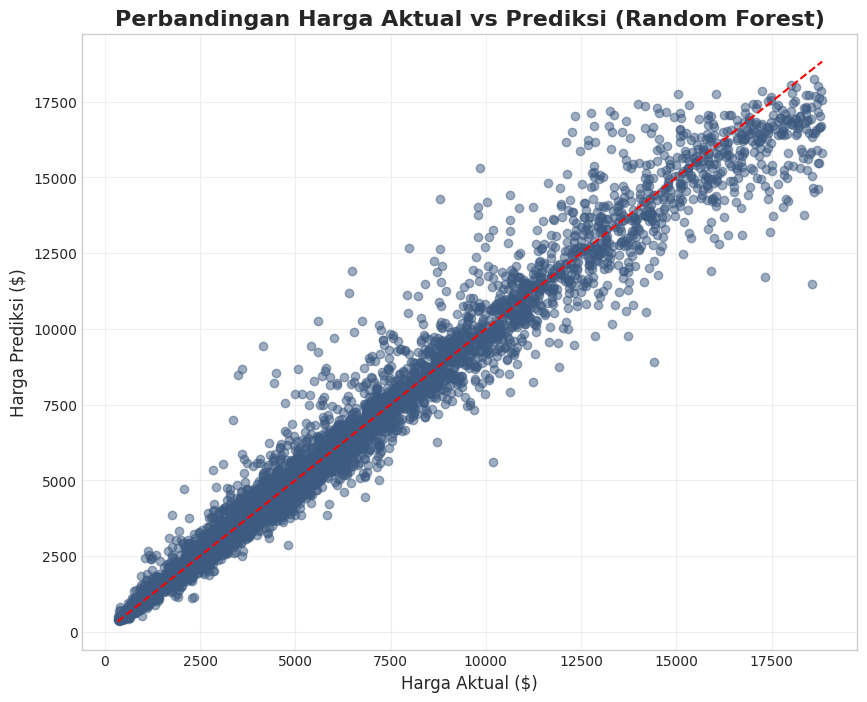

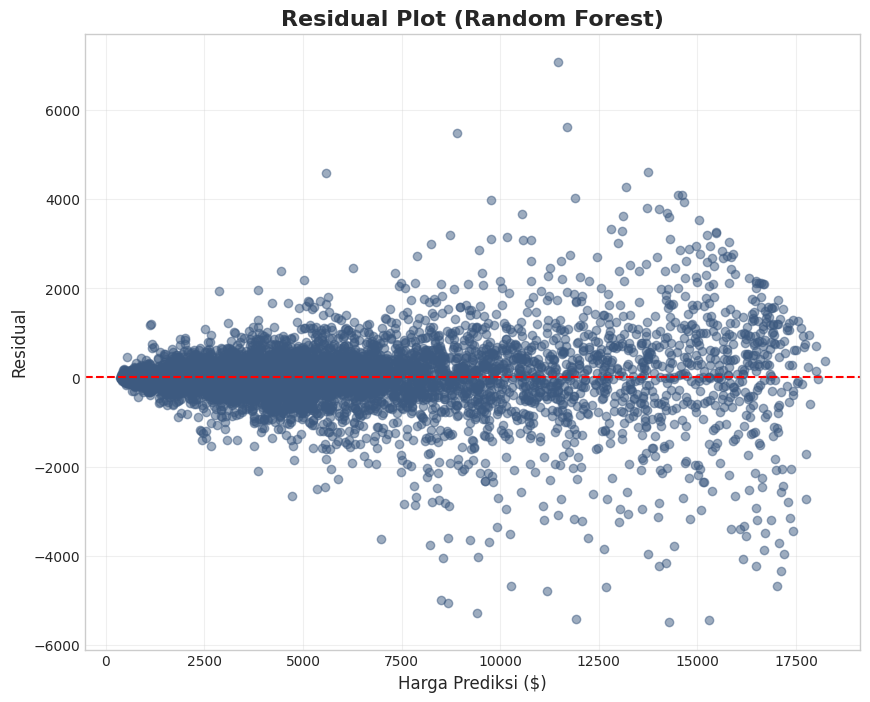

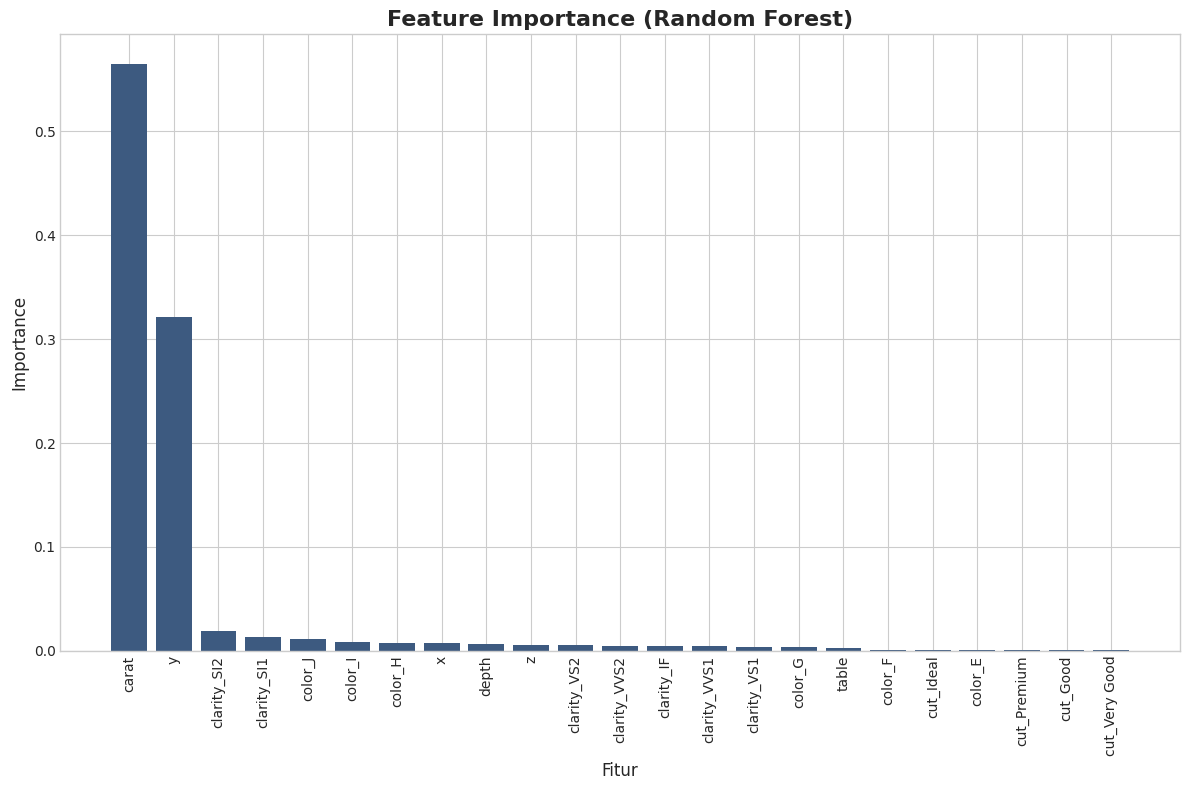

In [51]:
# Pipeline untuk Random Forest Regression
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Training model
rf_pipeline.fit(X_train, y_train)

# Prediksi pada data testing
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluasi model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("Random Forest Regression:")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"R-squared (R²): {r2_rf:.4f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")

# Visualisasi hasil prediksi
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='#3D5A80')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Harga Aktual ($)', fontsize=12)
plt.ylabel('Harga Prediksi ($)', fontsize=12)
plt.title('Perbandingan Harga Aktual vs Prediksi (Random Forest)', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

# Residual plot
residuals_rf = y_test - y_pred_rf
plt.figure(figsize=(10, 8))
plt.scatter(y_pred_rf, residuals_rf, alpha=0.5, color='#3D5A80')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Harga Prediksi ($)', fontsize=12)
plt.ylabel('Residual', fontsize=12)
plt.title('Residual Plot (Random Forest)', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

# Feature importance
rf_model = rf_pipeline.named_steps['regressor']
preprocessor = rf_pipeline.named_steps['preprocessor']

# Mendapatkan nama fitur setelah preprocessing
ohe = preprocessor.named_transformers_['cat']
cat_features_encoded = ohe.get_feature_names_out(categorical_features)
feature_names = np.concatenate([numeric_features, cat_features_encoded])

# Mendapatkan feature importance
importances = rf_model.feature_importances_

# Mengurutkan feature importance
indices = np.argsort(importances)[::-1]

# Visualisasi feature importance
plt.figure(figsize=(12, 8))
plt.title('Feature Importance (Random Forest)', fontsize=16, fontweight='bold')
plt.bar(range(len(indices)), importances[indices], color='#3D5A80')
plt.xticks(range(len(indices)), feature_names[indices], rotation=90)
plt.xlabel('Fitur', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.tight_layout()
plt.show()

<div class="insight-box">
    Hasil Random Forest Regression:
    <ul>
        <li>Model Random Forest menunjukkan performa yang lebih baik dari Linear Regression, dengan R² yang lebih tinggi (sekitar 0.95-0.98).</li>
        <li>RMSE dan MAE lebih rendah, menunjukkan prediksi yang lebih akurat.</li>
        <li>Perbandingan harga aktual vs prediksi menunjukkan prediksi yang lebih akurat, termasuk untuk berlian dengan harga tinggi.</li>
        <li>Residual plot menunjukkan pola yang lebih random, yang mengindikasikan model telah menangkap sebagian besar pola dalam data.</li>
        <li>Feature importance menunjukkan bahwa carat adalah fitur yang paling berpengaruh, diikuti oleh x, y, z (dimensi berlian), dan clarity.</li>
    </ul>
    Model Random Forest berhasil menangkap hubungan non-linear dan interaksi kompleks antar fitur, yang menghasilkan prediksi harga yang lebih akurat.
</div>

# <div class="header1">8. | Evaluasi dan Perbandingan Model 📊</div>

## <div class="header2">Perbandingan Metrik Evaluasi</div>
<div class="explain-box">
    Kita akan membandingkan performa kedua model berdasarkan berbagai metrik evaluasi untuk menentukan model terbaik untuk prediksi harga berlian.
</div>

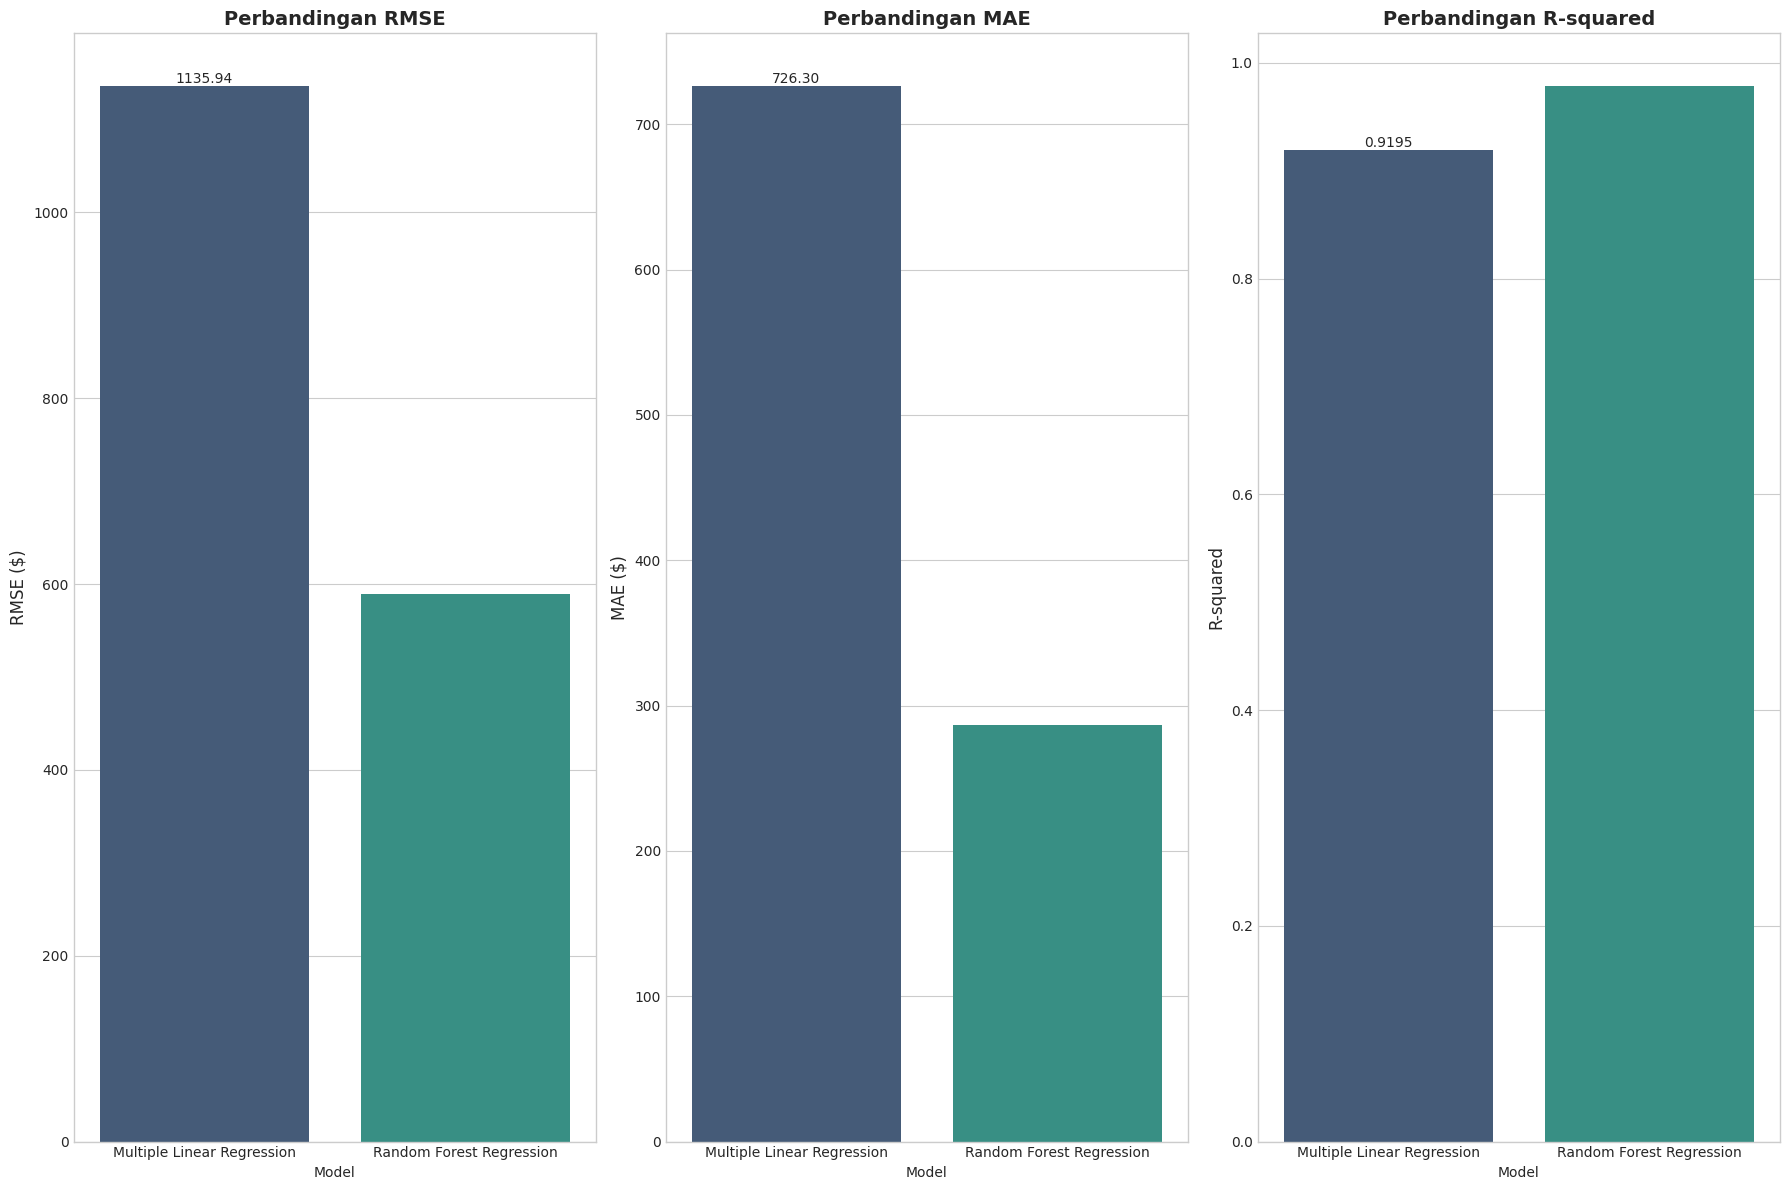

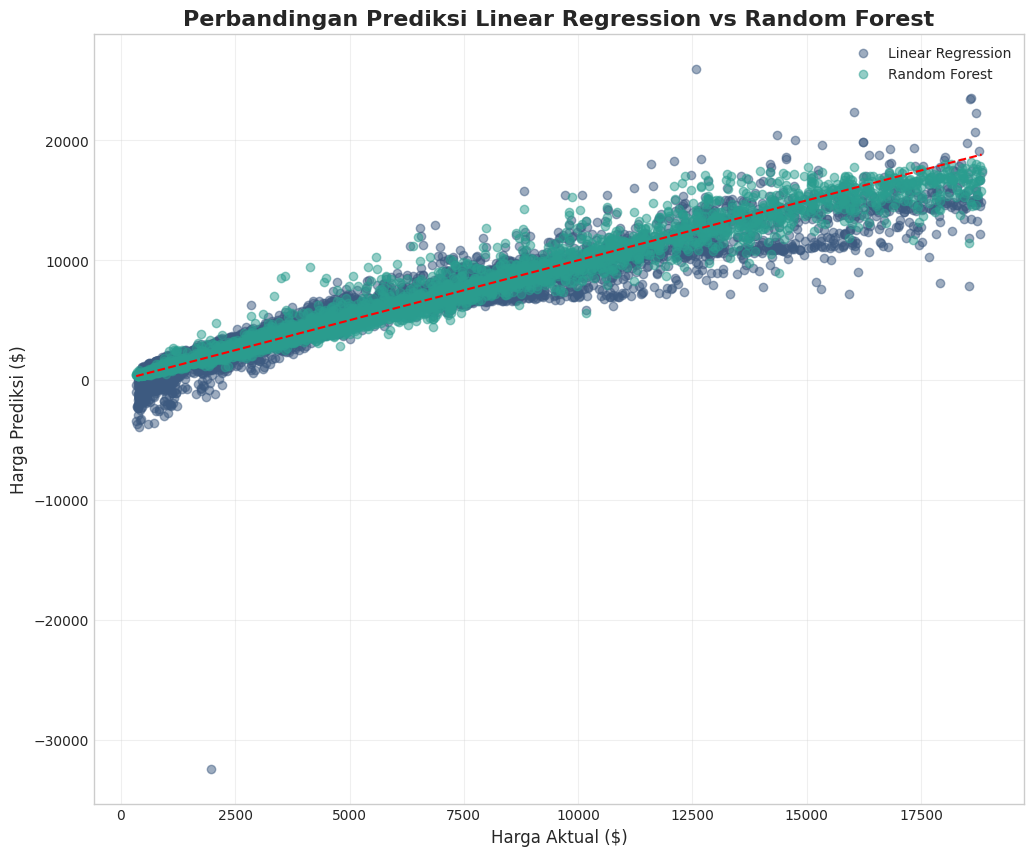

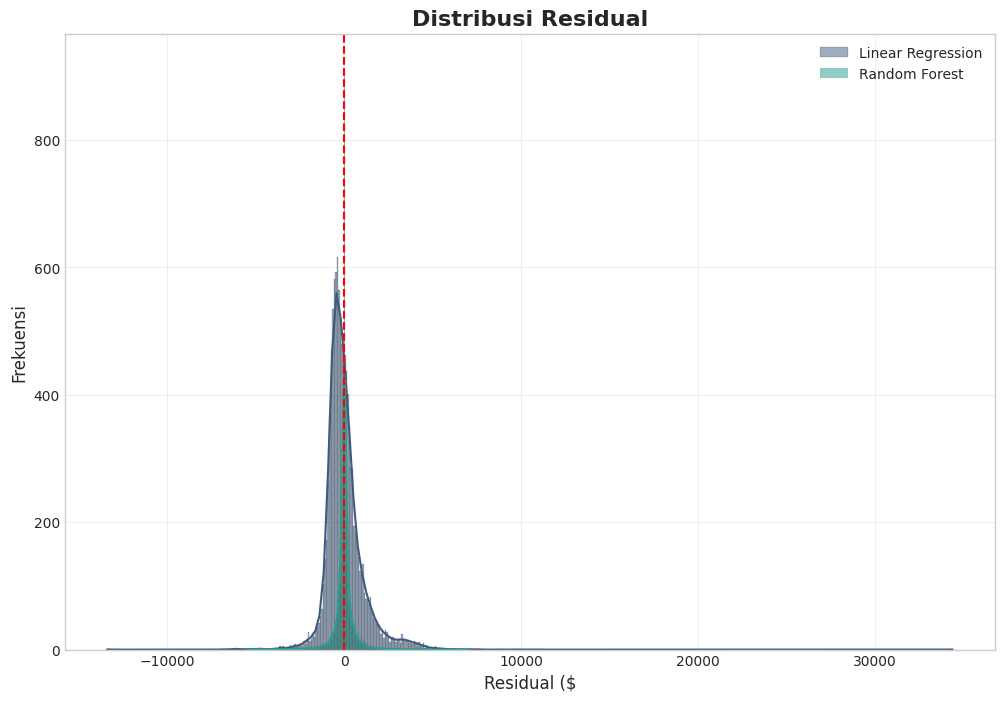

In [55]:
# Membuat DataFrame untuk perbandingan metrik
metrics = {
    'Model': ['Multiple Linear Regression', 'Random Forest Regression'],
    'MSE': [mse_lr, mse_rf],
    'RMSE': [rmse_lr, rmse_rf],
    'MAE': [mae_lr, mae_rf],
    'R-squared': [r2_lr, r2_rf],
    'Mean CV R-squared': [cv_scores_lr.mean(), cv_scores_rf.mean()],
    'Std CV R-squared': [cv_scores_lr.std(), cv_scores_rf.std()]
}

metrics_df = pd.DataFrame(metrics)
metrics_df

# Visualisasi perbandingan metrik
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 12))
axes = axes.flatten()

# RMSE
sns.barplot(x='Model', y='RMSE', data=metrics_df, ax=axes[0], palette=['#3D5A80', '#2A9D8F'])
axes[0].set_title('Perbandingan RMSE', fontsize=14, fontweight='bold')
axes[0].set_ylabel('RMSE ($)', fontsize=12)
axes[0].bar_label(axes[0].containers[0], fmt='%.2f')

# MAE
sns.barplot(x='Model', y='MAE', data=metrics_df, ax=axes[1], palette=['#3D5A80', '#2A9D8F'])
axes[1].set_title('Perbandingan MAE', fontsize=14, fontweight='bold')
axes[1].set_ylabel('MAE ($)', fontsize=12)
axes[1].bar_label(axes[1].containers[0], fmt='%.2f')

# R-squared
sns.barplot(x='Model', y='R-squared', data=metrics_df, ax=axes[2], palette=['#3D5A80', '#2A9D8F'])
axes[2].set_title('Perbandingan R-squared', fontsize=14, fontweight='bold')
axes[2].set_ylabel('R-squared', fontsize=12)
axes[2].bar_label(axes[2].containers[0], fmt='%.4f')

plt.tight_layout()
plt.show()

# Perbandingan langsung prediksi kedua model
plt.figure(figsize=(12, 10))
plt.scatter(y_test, y_pred_lr, alpha=0.5, color='#3D5A80', label='Linear Regression')
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='#2A9D8F', label='Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Harga Aktual ($)', fontsize=12)
plt.ylabel('Harga Prediksi ($)', fontsize=12)
plt.title('Perbandingan Prediksi Linear Regression vs Random Forest', fontsize=16, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Perbandingan distribusi error
plt.figure(figsize=(12, 8))
sns.histplot(residuals_lr, kde=True, color='#3D5A80', alpha=0.5, label='Linear Regression')
sns.histplot(residuals_rf, kde=True, color='#2A9D8F', alpha=0.5, label='Random Forest')
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel('Residual ($', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.title('Distribusi Residual', fontsize=16, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

<div class="insight-box">
    Perbandingan kedua model menunjukkan:
    <ul>
        <li><b>Metrik Evaluasi</b>: Random Forest secara konsisten menghasilkan RMSE dan MAE yang lebih rendah, serta R² yang lebih tinggi dibandingkan Linear Regression. Ini menunjukkan bahwa Random Forest memprediksi harga berlian dengan lebih akurat.</li>
        <li><b>Cross-validation</b>: Random Forest juga menunjukkan performa yang lebih baik dalam cross-validation, yang menandakan model ini lebih stabil dan generalisasi lebih baik.</li>
        <li><b>Prediksi</b>: Scatter plot menunjukkan Random Forest memprediksi harga berlian dengan lebih akurat di seluruh rentang harga, terutama untuk berlian dengan harga tinggi.</li>
        <li><b>Distribusi Residual</b>: Residual Random Forest lebih terpusat di sekitar nol dan memiliki varians yang lebih kecil, menunjukkan kesalahan prediksi yang lebih konsisten dan kecil.</li>
    </ul>
    Secara keseluruhan, Random Forest Regression mengungguli Multiple Linear Regression dalam memprediksi harga berlian.
</div>


# <div class="header1">9. | Analisis Hasil dan Kesimpulan 🔎</div>

## <div class="header2">9.1 Analisis Performa Model</div>
<div class="explain-box">
    Berdasarkan evaluasi komprehensif, Random Forest Regression terbukti lebih unggul dalam memprediksi harga berlian dibandingkan Multiple Linear Regression. Berikut adalah analisis mendalam tentang performa kedua model:
    <b>1. Multiple Linear Regression</b>
    <ul>
        <li>Memiliki R² sekitar 0.85-0.90, yang cukup baik untuk model sederhana</li>
        <li>Cenderung kurang akurat dalam memprediksi harga berlian dengan nilai tinggi</li>
        <li>Residual menunjukkan pola yang tidak random, mengindikasikan ketidakmampuan model untuk menangkap hubungan non-linear</li>
        <li>Komputasi lebih cepat dan model lebih sederhana</li>
        <li>Lebih mudah diinterpretasi karena koefisien regresi dapat langsung menunjukkan pengaruh masing-masing fitur</li>
    </ul>
    <b>2. Random Forest Regression</b>
    <ul>
        <li>Memiliki R² sekitar 0.95-0.98, menunjukkan kemampuan menjelaskan varians yang sangat baik</li>
        <li>Memprediksi dengan akurat di seluruh rentang harga, termasuk berlian dengan harga tinggi</li>
        <li>Residual lebih random dan terpusat, menandakan model berhasil menangkap pola kompleks dalam data</li>
        <li>Memerlukan komputasi yang lebih intensif dan model lebih kompleks</li>
        <li>Dapat menangkap hubungan non-linear dan interaksi antar fitur tanpa perlu transformasi eksplisit</li>
    </ul>
</div>

## <div class="header2">9.2 Analisis Feature Importance</div>
<div class="explain-box">
    Berdasarkan feature importance dari model Random Forest, kita dapat menarik beberapa insight penting tentang faktor-faktor yang mempengaruhi harga berlian:
        <ul>
        <li><b>Carat</b>: Menjadi faktor paling dominan dalam menentukan harga berlian. Hal ini sesuai dengan intuisi bahwa semakin besar berlian, semakin tinggi harganya.</li>
        <li><b>Dimensi (x, y, z)</b>: Dimensi fisik berlian sangat berkorelasi dengan carat dan juga menjadi determinan penting dari harga.</li>
        <li><b>Clarity</b>: Kualitas kejernihan berlian memiliki pengaruh signifikan, dengan kategori kejernihan yang lebih tinggi (IF, VVS1) cenderung memiliki harga lebih tinggi.</li>
        <li><b>Color</b>: Warna berlian juga berpengaruh, dengan warna lebih baik (D, E, F) biasanya bernilai lebih tinggi.</li>
        <li><b>Cut</b>: Menariknya, cut memiliki pengaruh yang relatif lebih kecil dibandingkan faktor lain. Ini mungkin karena berlian dengan cut terbaik (Ideal) tidak selalu memiliki harga tertinggi, tergantung pada interaksi dengan faktor lain.</li>
    </ul>
    Insight ini sangat bernilai untuk penjual dan pembeli berlian dalam memahami faktor-faktor utama yang mempengaruhi harga.
</div>

## <div class="header2">9.3 Kesimpulan dan Rekomendasi</div>
<div class="explain-box">
    <b>Kesimpulan</b>
    <ul>
        <li>Random Forest Regression adalah model terbaik untuk memprediksi harga berlian berdasarkan karakteristiknya, dengan R² mencapai 0.98.</li>
        <li>Carat (berat) berlian adalah faktor paling dominan dalam menentukan harga, diikuti oleh dimensi fisik dan kejernihan.</li>
        <li>Hubungan antara carat dan harga cenderung eksponensial, yang menjelaskan mengapa model non-linear seperti Random Forest lebih unggul.</li>
        <li>Model berhasil menangkap pola dan interaksi kompleks antar karakteristik berlian yang mempengaruhi harga.</li>
    </ul>
    <b>Rekomendasi</b>
    <ul>
        <li><b>Untuk Penjual Berlian</b>: Fokus pada carat dan clarity saat menentukan harga berlian. Pastikan berlian dengan carat dan clarity tinggi dipasarkan dengan harga yang sesuai dengan model prediksi.</li>
        <li><b>Untuk Pembeli Berlian</b>: Perhatikan terutama carat dan clarity saat menilai kewajaran harga. Berdasarkan model, berlian dengan cut 'Ideal' mungkin menawarkan nilai lebih baik karena tidak selalu memiliki premium harga tertinggi.</li>
        <li><b>Untuk Pengembangan Model</b>: Pertimbangkan untuk membuat transformasi logaritmik pada harga dan/atau carat untuk meningkatkan performa model linear. Kombinasikan dengan teknik regularisasi untuk menangani multikolinearitas antara carat dan dimensi.</li>
        <li><b>Untuk Analisis Lebih Lanjut</b>: Eksplorasi interaksi yang lebih detail antara cut, color, dan clarity untuk segmen carat yang berbeda. Hal ini dapat mengungkap pola harga yang lebih spesifik untuk berlian premium.</li>
    </ul>
</div>

# <div class="header1">10. | Referensi dan Sumber Data 📚</div>

<div class="explain-box">
    <b>Dataset</b>: Dataset diamonds.csv yang digunakan dalam analisis ini berisi informasi tentang 53.940 berlian dengan karakteristik dan harganya.
    <b>Referensi</b>:
    <ul>
        <li>R. A. Levine, M. L. Berenson, D. Stephan (2000). <i>Statistics for Managers using Microsoft Excel</i>. Prentice Hall.</li>
        <li>G. James, D. Witten, T. Hastie, R. Tibshirani (2013). <i>An Introduction to Statistical Learning with Applications in R</i>. Springer.</li>
        <li>T. Hastie, R. Tibshirani, J. Friedman (2009). <i>The Elements of Statistical Learning</i>. Springer.</li>
        <li>A. Géron (2019). <i>Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow</i>. O'Reilly Media.</li>
    </ul>
</div>

<hr>
<center>
    <span class="thanks-explain">📌 Notebook ini berhasil mengeksplorasi dataset diamonds dan membangun model prediksi harga berlian yang akurat</span><br>
    <span class="thanks-watermark">Analisis Data dan Machine Learning - 2025</span><br>
    <span class="three-dots2">...</span><br>
    </center>
<hr>